From A. I. Lvovsky. Nonlinear and Quantum Optics notes we have the following:


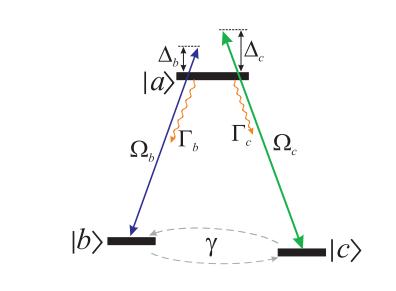

In [ ]:
!pip install qutip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 17.1 MB/s eta 0:00:00


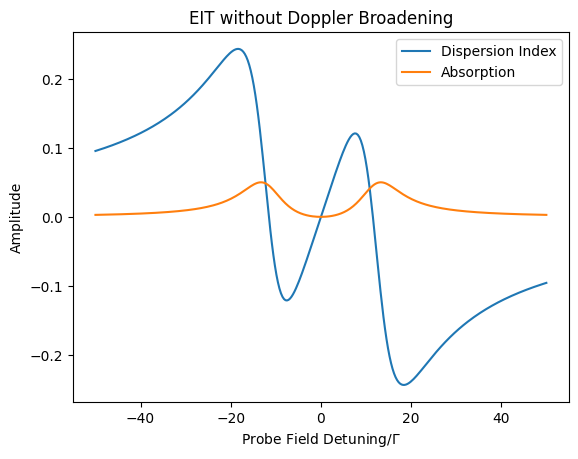

In [ ]:
afrom qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)   # state |a>
state_c = basis(3, 2)    # state |c>

# Simulation parameters
Delta_b = np.linspace(-50,50,300)               # Probe field detuning
Delta_c = 0                                     # Control field detuning

# Rabi frequencies for pump and control beam
import numpy as np
eps = 8.85*1e-12
hbar = 1.05*1e-34
dippole  = 3.58*1e-29
c = 3*1e8
power_c = 3e-3         # Power for Control beam
power_b = 1e-3         # Power for probe beam
radious = 2e-3
Omega_c = ((dippole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_c)/radious)/(2*np.pi*1e6)  # Devided by 2pi MHz, Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dippole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_b)/radious)/(2*np.pi*1e6)  # Devided by 2pi MHz, Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data and gussing the decoherence of the ground state
Gamma_b = .1         # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75          # 2pi MHz, Decay rate from |a> to |c>, control transition
gamma = 0.005          # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())    # |b><b|
cc = tensor(state_c * state_c.dag())    # |c><c|
ba = tensor(state_b * state_a.dag())   # |b><a|
ca = tensor(state_c * state_a.dag())   # |c><a|
cb = tensor(state_c * state_b.dag())    # |c><b|
bc = tensor(state_b * state_c.dag())    # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb   # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc   # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
c_c = 1
c_b = 0
c_a = 0
rho0 = c_c*cc + c_b*bb + c_a*aa

# Time-dependent Hamiltonian
#def H_t(t, args):
 #   omegaP_t = omegaP if t < args['t_pump_off'] else 0
  #  return delta * (sigma_ee - sigma_gg) + phi * (sigma_ee - sigma_uu) + \
   #        omegaP_t * (sigma_ge + sigma_ge.dag()) + omegap * (sigma_ue + sigma_ue.dag())

# Time points for the simulation
#t_pump_off = 5.0  # Time at which the pump field is turned off
tlist = np.linspace(0, 1, 300)

# Arguments for the time-dependent Hamiltonian
#args = {'t_pump_off': t_pump_off}

# Solve the master equation
#result = mesolve(H_t, rho0, tlist, collapse, [sigma_ge.dag(), sigma_ee, sigma_ge], args=args)


rho_aa = []
rho_ab = []
rho_ba = []
chi = []

for i in Delta_b:
  H = (Omega_b*(ba+ba.dag()) + Omega_c*(ca+ca.dag()) + Delta_c*(aa - cc) + i*(aa - bb))

  #result = mesolve(H, rho0, tlist, collapse, [ca.dag(), aa, ca, ba.dag()])
  result = steadystate(H, collapse)
  #rho_aa.append(result[2,2])   # Excited state population
  #rho_ab.append(result[2,0])
  #rho_ba.append(result[0,2])
  chi.append(expect(ba.dag(), result))

# Extract the results
#probe_coherence = result.expect[0]
#excited_population = result.expect[1]
#probe_coherence_conj = result.expect[2]
#chi = result.expect[3]
# Plot the results
#plt.figure()
#plt.plot(tlist, np.real(probe_coherence), label="Re(probe coherence)")
#plt.plot(tlist, np.imag(probe_coherence), label="Im(probe coherence)")
#plt.axvline(t_pump_off, color='r', linestyle='--', label="Pump off")
#plt.xlabel('Time')
#plt.ylabel('Probe Coherence')
#plt.legend()
#plt.title('Transient Effect of Turning Off the Pump Field')
#plt.show()

#plt.figure()
#plt.plot(tlist, excited_population, label="Excited State Population")
#plt.axvline(t_pump_off, color='r', linestyle='--', label="Pump off")
#plt.xlabel('Time')
#plt.ylabel('Excited State Population')
#plt.legend()
#plt.title('Excited State Population Over Time')
#  plt.show()



plt.title("EIT without Doppler Broadening")
plt.plot(Delta_b, np.real(chi), label = "Dispersion Index")
plt.plot(Delta_b, np.imag(chi), label = "Absorption")
plt.xlabel('Probe Field Detuning/$\Gamma$')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
Omega_c/Gamma_c

2.8298893006588672

We have the Maxwell-Boltzaman distribution as following:
$$f(v_x) = \sqrt\frac{1}{2\pi \sigma} \exp \left(-\frac{v_{x}^2}{2 \sigma^2}\right) $$, where $\sigma = \sqrt{\frac{k_B T}{m}}$

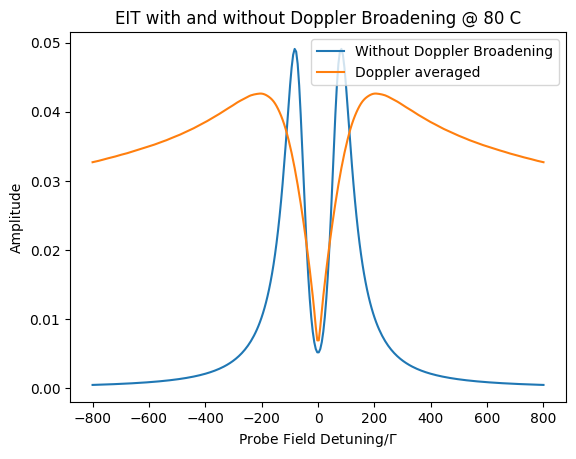

In [ ]:
# EIT with Doppler Broadening #
# Under construction #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np


# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)   # state |a>
state_c = basis(3, 2)    # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85*1e-12    # F/m
hbar = 1.05*1e-34   # J.s
dippole  = 3.58*1e-29   # C.m
c = 2.99792458e8 # m/s
power_c = 3e-3         # Power for Control beam
power_b = 1e-3         # Power for probe beam
radious = 2e-3         # of the beam
Omega_c = ((dippole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_c)/radious)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dippole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_b)/radious)  # Rabi frequency for |a> <-> |b>, probe

# Simulation parameters
Delta_b = np.linspace(-800*1e6,800*1e6,300)         # Probe field detuning
Delta_c = 0  # Control field detuning
length = 1e-2   # Length of the cell
gamma = 1 * 2*np.pi* 1e6   # Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80 # C, of the cell
w_b = (377.10746338*1e12 -  4.271676631815181*1e9) * (2*np.pi)  #Angular Freq of probe F=1
w_c = (377.10746338*1e12 +  2.563005979089109*1e9) * (2*np.pi)  #Angular Freq of control F=2
lmda_b = (2*np.pi)*c/w_b # Wavelength of the probe
lmda_c = (2*np.pi)*c/w_c # Wavelength of the control


# Decay rates from steck data
Gamma_b = 5.75 * 2*np.pi* 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2*np.pi* 1e6  # Decay rate from |a> to |c>, control transition

# Wavevector, Direciton of the beam
k_b = w_b/c  # wave number of probe, beams are co-propagating, for counter propagation multipy by -1
k_c = w_c/c  # wave number of control, beams are co-propagating, for counter propagation multipy by -1

# Number density Calc from the Claussius-Clapyron relation
Tk = temp + 273.15 # K
if Tk < 39.48 + 273.15:
  Pressure = 10**(2.881 + 4.857 - 4215/Tk)
else:
  Pressure = 10**(2.881 + 4.312 - 4040/Tk)
RBolt = 8.314 #j/mol.k
Nav = 6.02214076e23 #1/mol
numberDensity = Pressure*Nav/(RBolt*Tk)


# Define Maxwell Boltzman distribution
def MaxwellBoltzman(velocities, T):
  KBoltz = 1.380649e-23 # JK^-1
  massRb87 = 1.44316089500*1e-25 #kg Rb87
  sigmaMB = np.sqrt(KBoltz * T / massRb87)
  return np.sqrt(1/(2*np.pi*sigmaMB))*np.exp(-0.5*(velocities**2)/(sigmaMB**2))

Velocity_dis = np.linspace(-200,200,100)
MBD = MaxwellBoltzman(Velocity_dis, Tk)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())    # |b><b|
cc = tensor(state_c * state_c.dag())    # |c><c|
ba = tensor(state_b * state_a.dag())   # |b><a|
ca = tensor(state_c * state_a.dag())   # |c><a|
cb = tensor(state_c * state_b.dag())    # |c><b|
bc = tensor(state_b * state_c.dag())    # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb   # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc   # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
c_c = 1
c_b = 0
c_a = 0
rho0 = c_c*cc + c_b*bb + c_a*aa

rho_aa = []
rho_ab = []
rho_ba = []
chi = []


probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
Deltas = [0,0]
ks = [k_b, k_c]

# Considering both Ks are equal
for i, v in enumerate(Velocity_dis):
    for j, p in enumerate(Delta_b):
        Deltas[0] = p
        # For each value of velocity, calculate the effective detuning
        Deltas_eff = np.zeros(len(Deltas))
        for k in range(len(Deltas)):
            Deltas_eff[k] = Deltas[k]+(ks[k]*v)#*2*np.pi#*1e-6 # to convert to MHz
        H = (Omega_b*(ba+ba.dag()) + Omega_c*(ca+ca.dag()) + Deltas_eff[1]*(aa - cc) + Deltas_eff[0]*(aa - bb))
        result = steadystate(H, collapse)
        probe_coherence[i,j] = np.imag(expect(ba.dag(), result))
        #chi.append(expect(ba.dag(), result))

int_manual = np.zeros(len(Delta_b))
pdf = MaxwellBoltzman(Velocity_dis, Tk)
vel_step = Velocity_dis[-1] - Velocity_dis[-2]

# Perform the integration using the rectangle rule.
for i in range(len(Delta_b)):
    p_slice = probe_coherence[:,i]
    weighted = p_slice*pdf*vel_step
    int_manual[i] = np.sum(weighted)



for i in Delta_b:
  H = (Omega_b*(ba+ba.dag()) + Omega_c*(ca+ca.dag()) + Delta_c*(aa - cc) + i*(aa - bb))

  result = steadystate(H, collapse)
  chi.append(expect(ba.dag(), result))

plt.title("EIT with and without Doppler Broadening @ 80 C")
#plt.plot(Delta_b, np.real(chi), label = "Dispersion Index")
plt.plot(Delta_b/1e6, np.imag(chi), label = "Without Doppler Broadening")
plt.plot(Delta_b/1e6, int_manual, label = 'Doppler averaged')
#plt.plot(Delta_b, np.imag(chi), label = "Absorption")
plt.xlabel('Probe Field Detuning/$\Gamma$')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

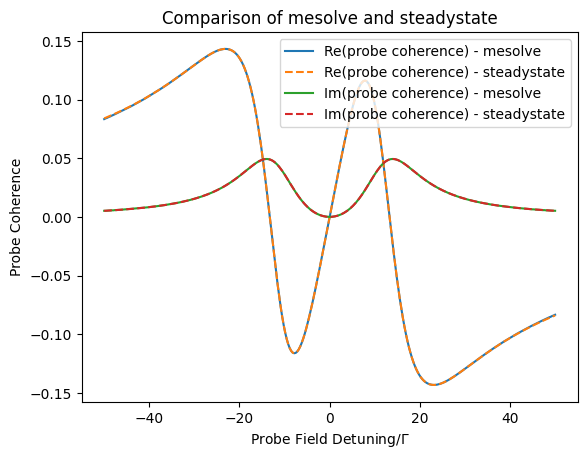

In [ ]:
# Comparison of the mesolve and steadystate solution #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)   # state |a>
state_c = basis(3, 2)    # state |c>

# Simulation parameters
Delta_b = np.linspace(-50, 50, 300)  # Probe field detuning
Delta_c = 0                          # Control field detuning

# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data and guessing the decoherence of the ground state
Gamma_b = 5.75  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75  # 2pi MHz, Decay rate from |a> to |c>, control transition
gamma = 0.005   # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a|
ca = tensor(state_c * state_a.dag())  # |c><a|
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb    # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc    # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = cc

# Time points for the simulation
tlist = np.linspace(0, 10, 300)

# Arrays to store results
probe_coherence_time = []
probe_coherence_steady = []

for delta in Delta_b:
    H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Delta_c * (aa - cc) + delta * (aa - bb))

    # Solve using mesolve
    result = mesolve(H, rho0, tlist, collapse, [ba.dag()])
    probe_coherence_time.append(result.expect[0][-1])  # Last value as steady-state

    # Solve using steadystate
    rho_ss = steadystate(H, collapse)
    probe_coherence_steady.append(expect(ba.dag(), rho_ss))

# Plot the results
plt.plot(Delta_b, np.real(probe_coherence_time), label="Re(probe coherence) - mesolve")
plt.plot(Delta_b, np.real(probe_coherence_steady), '--', label="Re(probe coherence) - steadystate")
plt.plot(Delta_b, np.imag(probe_coherence_time), label="Im(probe coherence) - mesolve")
plt.plot(Delta_b, np.imag(probe_coherence_steady), '--', label="Im(probe coherence) - steadystate")
plt.xlabel('Probe Field Detuning/$\Gamma$')
plt.ylabel('Probe Coherence')
plt.legend()
plt.title('Comparison of mesolve and steadystate')
plt.show()


<ipython-input-6-e1da6f842f29>:80: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-k * (x - x0)))


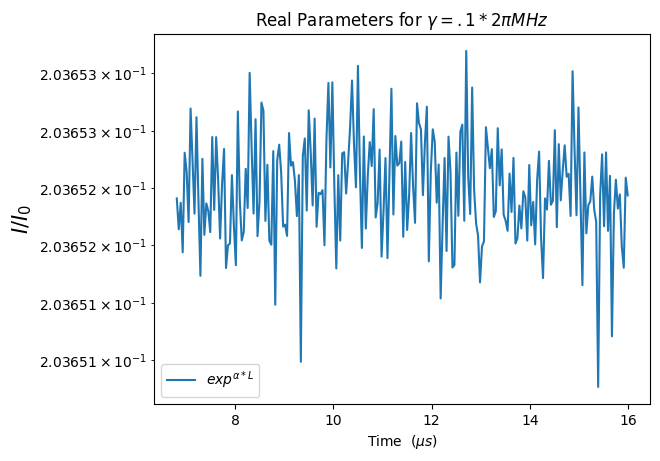

In [ ]:
####### Real Parameters #######

from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Simulation parameters
Delta_b = 0  # On resonance Probe field detuning
Delta_c = 0  # Control field detuning
length = 1e-2   # Length of the cell
gamma = .1 * 2*np.pi* 1e6   # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80 # C, of the cell
lmda_b = 795e-9  # Wavelength of the probe


# Rabi frequencies for pump and control beam Calc
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius)  # Rabi frequency for |a> <-> |b>, probe

# Wavenumber
k = 2*np.pi/lmda_b  # wave number
#omega = (c*k) # normalized to 2pi MHz


# Number density Calc from the Claussius-Clapyron relation
Tk = temp + 273.15 # K
if Tk < 39.48 + 273.15:
  Pressure = 10**(2.881 + 4.857 - 4215/Tk)
else:
  Pressure = 10**(2.881 + 4.312 - 4040/Tk)
RBolt = 8.314 #j/mol.k
Nav = 6.02214076e23 #1/mol
numberDensity = Pressure*Nav/(RBolt*Tk)

# Decay rates from steck data
Gamma_b = .1 * 2*np.pi* 1e6  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2*np.pi* 1e6  # 2pi MHz, Decay rate from |a> to |c>, control transition


# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a|
ca = tensor(state_c * state_a.dag())  # |c><a|
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb    # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc    # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
c_c = .5       # Population of the state_c
c_b = .5       # Population of the state_b
c_a = 0       # Population of the state_a
rho0 = c_c*cc + c_b*bb + c_a*aa

# Time points for the simulation
tlist = np.linspace(0, 20, 500) / (1e6)
t_pump_off = 10.0 / (1e6)  # Time at which the pump field is turned off

# Sigmoid function for smooth transition
def sigmoid(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))


# Time-dependent Hamiltonian
def H_t(t, args):
    Omega_c_t = Omega_c * sigmoid(t, t_pump_off, -5.5*Gamma_c)  # Sigmoid transition
    return (Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Delta_c * (aa - cc) + Delta_b * (aa - bb))

# Solve the master equation
result = mesolve(H_t, rho0, tlist, collapse, [ba.dag()])

# Extract the results
probe_coherence = result.expect[0]
alpha = (k)*(numberDensity*dipole**2/(hbar*eps*Omega_b))*np.imag(probe_coherence)
#dispersion = np.real(probe_coherence)
absorption = np.exp(-alpha*length)

#xtime = np.linspace(2, 10, 300) / (1e6)
# Plot the results
plt.plot(tlist[170:400] *(1e6), absorption[170:400], label="$exp^{\\alpha*L}$")
#plt.plot(tlist, dispersion, label="Dispersion")
#plt.axvline(t_pump_off*1e6, color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time  ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize = 15)
plt.yscale('log')
plt.legend()
plt.title('Real Parameters for $\gamma = .1* 2\pi MHz$')
plt.show()


In [ ]:
Omega_b/Gamma_c

1.6338373495122382

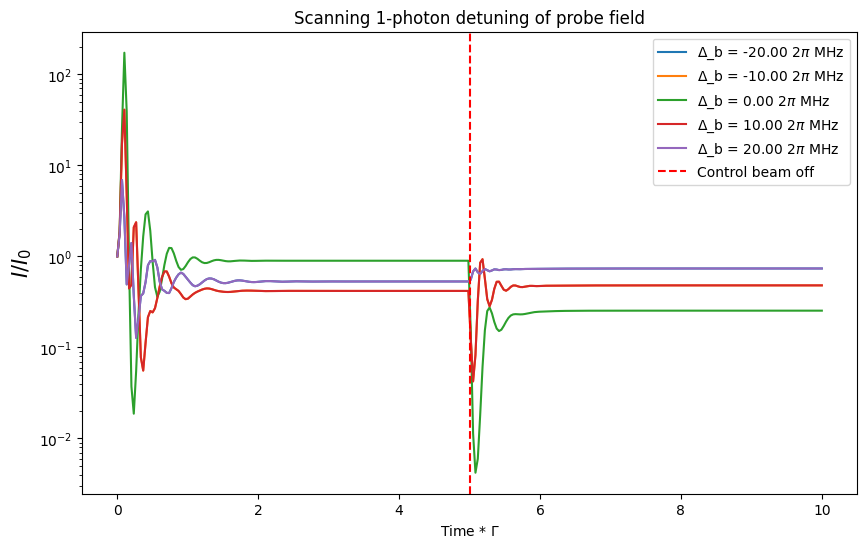

In [ ]:
####### Scanning 1-photon detuning #######
########  with Real Parameters ###########

from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Simulation parameters
Delta_b_values = np.linspace(-20 * 2 * np.pi * 1e6, 20 * 2 * np.pi * 1e6, 5)  # Various one-photon detuning for the Probe field
Delta_c = 0  # Control field detuning
length = 1e-2  # Length of the cell
gamma = 1 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80  # C, temperature of the cell
lambda_b = 795e-9  # Wavelength of the probe

# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius)  # Rabi frequency for |a> <-> |b>, probe

# Wavenumber
k = 2 * np.pi / lambda_b  # wave number

# Number density calculation from the Claussius-Clapyron relation
Tk = temp + 273.15  # K
if Tk < 39.48 + 273.15:
    Pressure = 10**(2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10**(2.881 + 4.312 - 4040 / Tk)
RBolt = 8.314  # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)

# Decay rates from steck data
Gamma_b = 5.75 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |c>, control transition

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a|
ca = tensor(state_c * state_a.dag())  # |c><a|
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = cc

# Time points for the simulation
tlist = np.linspace(0, 10, 300) / (2 * np.pi * 1e6)
t_pump_off = 5.0 / (2 * np.pi * 1e6)  # Time at which the pump field is turned off

# Store results
absorption_list = []

for Delta_b in Delta_b_values:
    # Time-dependent Hamiltonian
    def H_t(t, args):
        Omega_c_t = Omega_c if t < t_pump_off else 0
        return (Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Delta_c * (aa - cc) + Delta_b * (aa - bb))

    # Solve the master equation
    result = mesolve(H_t, rho0, tlist, collapse, [ba.dag()])

    # Extract the results
    probe_coherence = result.expect[0]
    alpha = k * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * np.imag(probe_coherence)
    absorption = np.exp(-alpha * length)
    absorption_list.append(absorption)

# Convert results to numpy array for easier plotting
absorption_list = np.array(absorption_list)

# Plot the results
plt.figure(figsize=(10, 6))
for i, Delta_b in enumerate(Delta_b_values):
    plt.plot(tlist * (2 * np.pi * 1e6), absorption_list[i], label=f"Δ_b = {Delta_b / (2 * np.pi * 1e6):.2f} 2$\pi$ MHz")

plt.axvline(t_pump_off * (2 * np.pi * 1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time * $\Gamma$')
plt.ylabel('$I/I_0$', fontsize=15)
plt.yscale('log')
plt.legend()
plt.title('Scanning 1-photon detuning of probe field')
plt.show()


In the weak probe regime, $\Omega_b << \Omega_c$, by using perturbative approach to the solution, i.e. keeping only the linear terms in $\Omega_b$, we can come up with the following analytical eq for the steady state coherence:
$\rho_{ba}=i \Omega_{\mathrm{b}} \frac{\Gamma_{bc}}{\Gamma_{bc} \Gamma_{ba}+\left|\Omega_{\mathrm{c}}\right|^2}$, where $\Gamma_{bc} = \gamma - i\delta$ which $\delta$ is two photon detuning, and $\Gamma_{ba} = \Gamma_{b} - i\Delta_b$.

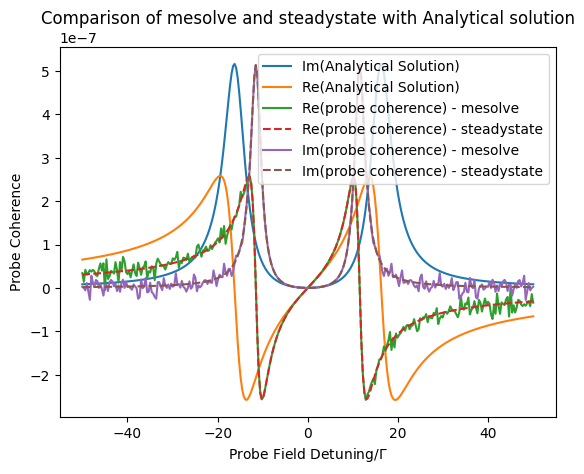

In [ ]:
# Comparing steady state coherence from anylitical to the numerical solutions #
####### Real Parameters #######

from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)    # state |a>
state_c = basis(3, 2)    # state |c>

# Simulation parameters
Delta_b = np.linspace(-50, 50, 300)  # Probe field detuning
Delta_c = 0                          # Control field detuning

# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = .0000000001e-6  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data and guessing the decoherence of the ground state
Gamma_b = 5.75  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75  # 2pi MHz, Decay rate from |a> to |c>, control transition
gamma = 0.005   # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)

# Define the operators
aa = state_a * state_a.dag()  # |a><a|
bb = state_b * state_b.dag()  # |b><b|
cc = state_c * state_c.dag()  # |c><c|
ba = state_b * state_a.dag()  # |b><a|
ca = state_c * state_a.dag()  # |c><a|
cb = state_c * state_b.dag()  # |c><b|
bc = state_b * state_c.dag()  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb    # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc    # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = cc

# Time points for the simulation
tlist = np.linspace(0, 10, 300)

# Arrays to store results
probe_coherence_time = []
probe_coherence_steady = []

for delta in Delta_b:
    H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Delta_c * (aa - cc) + delta * (aa - bb))

    # Solve using mesolve
    result = mesolve(H, rho0, tlist, collapse, [ba.dag()])
    probe_coherence_time.append(result.expect[0][-1])  # Last value as steady-state

    # Solve using steadystate
    rho_ss = steadystate(H, collapse)
    probe_coherence_steady.append(expect(ba.dag(), rho_ss))

# Analytical solution for the off-diagonal element of the density matrix
rho_ba_analytical = []
rho_ba_analyticalreal = []
for Delta in Delta_b:
    rho_ba = 1j * Omega_b * (gamma - 1j * (Delta - Delta_c)) / ((gamma - 1j * (Delta - Delta_c)) * (Gamma_b - 1j * Delta) + Omega_c**2)
    rho_ba_analytical.append(np.imag(rho_ba))
    rho_ba_analyticalreal.append(np.real(rho_ba))

# Plot the results
plt.plot(Delta_b, rho_ba_analytical, label="Im(Analytical Solution)")
plt.plot(Delta_b, rho_ba_analyticalreal, label="Re(Analytical Solution)")
plt.plot(Delta_b, np.real(probe_coherence_time), label="Re(probe coherence) - mesolve")
plt.plot(Delta_b, np.real(probe_coherence_steady), '--', label="Re(probe coherence) - steadystate")
plt.plot(Delta_b, np.imag(probe_coherence_time), label="Im(probe coherence) - mesolve")
plt.plot(Delta_b, np.imag(probe_coherence_steady), '--', label="Im(probe coherence) - steadystate")
plt.xlabel('Probe Field Detuning/$\Gamma$')
plt.ylabel('Probe Coherence')
plt.legend()
plt.title('Comparison of mesolve and steadystate with Analytical solution')
plt.show()


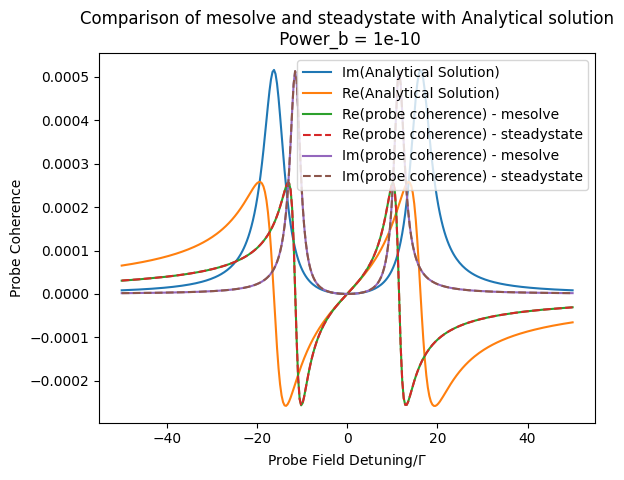

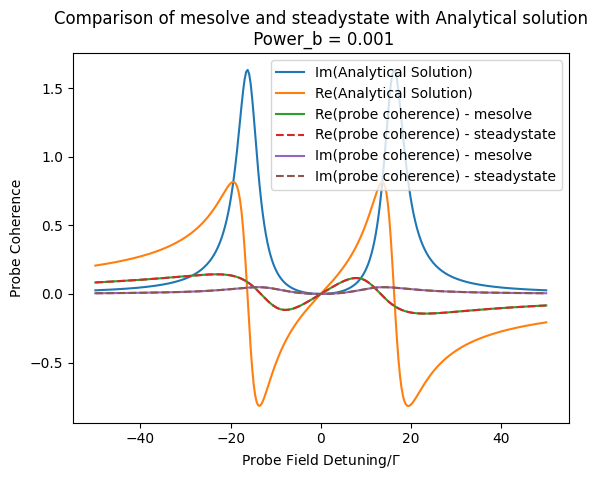

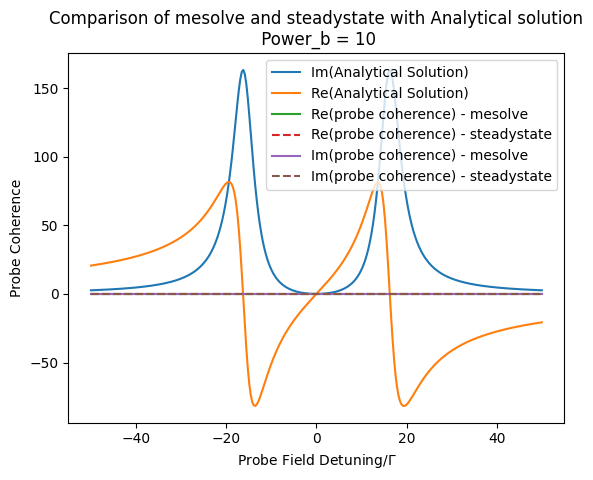

In [ ]:
# Sweeping over the probe power #
# Comparing steady state coherence from anylitical to the numerical solutions #
####### Real Parameters #######
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)    # state |a>
state_c = basis(3, 2)    # state |c>

# Simulation parameters
Delta_b = np.linspace(-50, 50, 300)  # Probe field detuning
Delta_c = 0                          # Control field detuning

# Constants
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |c>, Control

# Decay rates from steck data and guessing the decoherence of the ground state
Gamma_b = 5.75  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75  # 2pi MHz, Decay rate from |a> to |c>, control transition
gamma = 0.005   # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)

# Define the operators
aa = state_a * state_a.dag()  # |a><a|
bb = state_b * state_b.dag()  # |b><b|
cc = state_c * state_c.dag()  # |c><c|
ba = state_b * state_a.dag()  # |b><a|
ca = state_c * state_a.dag()  # |c><a|
cb = state_c * state_b.dag()  # |c><b|
bc = state_b * state_c.dag()  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb    # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc    # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = cc

# Time points for the simulation
tlist = np.linspace(0, 10, 300)

# Power for probe beam
power_b_list = [1e-10, 1e-3, 10]

# Arrays to store results
results = {}

for power_b in power_b_list:
    Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |b>, probe

    probe_coherence_time = []
    probe_coherence_steady = []

    for delta in Delta_b:
        H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Delta_c * (aa - cc) + delta * (aa - bb))

        # Solve using mesolve
        result = mesolve(H, rho0, tlist, collapse, [ba.dag()])
        probe_coherence_time.append(result.expect[0][-1])  # Last value as steady-state

        # Solve using steadystate
        rho_ss = steadystate(H, collapse)
        probe_coherence_steady.append(expect(ba.dag(), rho_ss))

    results[power_b] = (probe_coherence_time, probe_coherence_steady)

    # Analytical solution for the off-diagonal element of the density matrix
    rho_ba_analytical = []
    rho_ba_analyticalreal = []
    for Delta in Delta_b:
        rho_ba = 1j * Omega_b * (gamma - 1j * (Delta - Delta_c)) / ((gamma - 1j * (Delta - Delta_c)) * (Gamma_b - 1j * Delta) + Omega_c**2)
        rho_ba_analytical.append(np.imag(rho_ba))
        rho_ba_analyticalreal.append(np.real(rho_ba))

    # Plot the results
    plt.figure()
    plt.plot(Delta_b, rho_ba_analytical, label="Im(Analytical Solution)")
    plt.plot(Delta_b, rho_ba_analyticalreal, label="Re(Analytical Solution)")
    plt.plot(Delta_b, np.real(probe_coherence_time), label="Re(probe coherence) - mesolve")
    plt.plot(Delta_b, np.real(probe_coherence_steady), '--', label="Re(probe coherence) - steadystate")
    plt.plot(Delta_b, np.imag(probe_coherence_time), label="Im(probe coherence) - mesolve")
    plt.plot(Delta_b, np.imag(probe_coherence_steady), '--', label="Im(probe coherence) - steadystate")
    plt.xlabel('Probe Field Detuning/$\Gamma$')
    plt.ylabel('Probe Coherence')
    plt.legend()
    plt.title(f'Comparison of mesolve and steadystate with Analytical solution\n Power_b = {power_b}')
    plt.show()


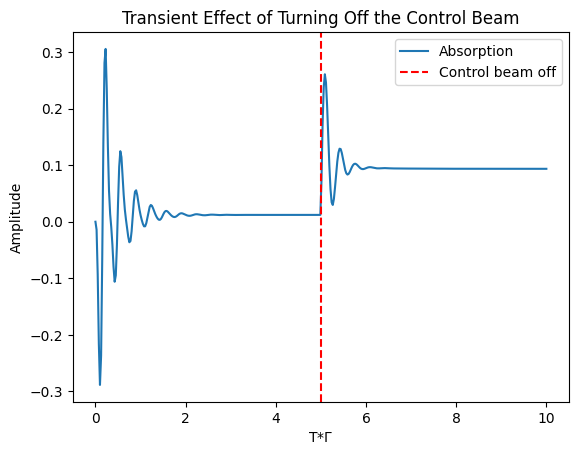

In [ ]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Simulation parameters
Delta_b = 0.0* 2 * np.pi * 1e6#0  # On resonance Probe field detuning
Delta_c = 0.0* 2 * np.pi * 1e6#0  # Control field detuning
length = 1e-2   # Length of the cell
gamma = 1   # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)


# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data and guessing the decoherence of the ground state
Gamma_b = .1#5.75  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75  # 2pi MHz, Decay rate from |a> to |c>, control transition


# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a|
ca = tensor(state_c * state_a.dag())  # |c><a|
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb    # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc    # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = cc

# Time points for the simulation
tlist = np.linspace(0, 10, 400)
t_pump_off = 5.0  # Time at which the pump field is turned off

# Time-dependent Hamiltonian
def H_t(t, args):
    Omega_c_t = Omega_c if t < t_pump_off else 0
    return (Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Delta_c * (aa - cc) + Delta_b * (aa - bb))

# Solve the master equation
result = mesolve(H_t, rho0, tlist, collapse, [ba.dag()])

# Extract the results
probe_coherence = result.expect[0]
alpha = np.imag(probe_coherence)
dispersion = np.real(probe_coherence)
absorption = np.exp(-alpha*length)

# Plot the results
plt.plot(tlist, alpha, label="Absorption")
#plt.plot(tlist, dispersion, label="Dispersion")
plt.axvline(t_pump_off, color='r', linestyle='--', label="Control beam off")
plt.xlabel('T*$\Gamma$')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Transient Effect of Turning Off the Control Beam')
plt.show()


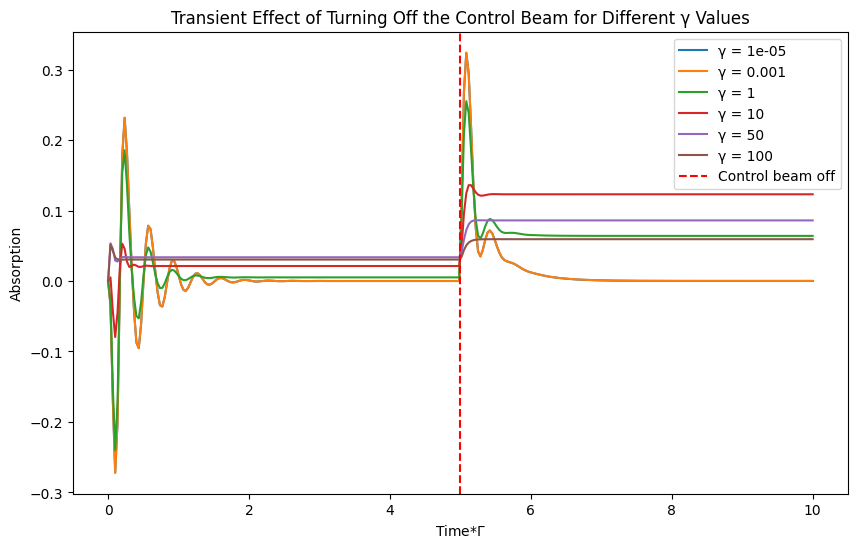

In [ ]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Simulation parameters
Delta_b = 0  # On resonance Probe field detuning
Delta_c = 0  # Control field detuning
length = 1e-2   # Length of the cell
gammas = [1e-5, 1e-3, 1, 10, 50, 100]   # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)

# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data and guessing the decoherence of the ground state
Gamma_b = 5.75  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75  # 2pi MHz, Decay rate from |a> to |c>, control transition

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b>
cc = tensor(state_c * state_c.dag())  # |c><c>
ba = tensor(state_b * state_a.dag())  # |b><a>
ca = tensor(state_c * state_a.dag())  # |c><a>
cb = tensor(state_c * state_b.dag())  # |c><b>
bc = tensor(state_b * state_c.dag())  # |b><c|

# Initial state
rho0 = cc

# Time points for the simulation
tlist = np.linspace(0, 10, 300)
t_pump_off = 5.0  # Time at which the pump field is turned off

# Time-dependent Hamiltonian
def H_t(t, args):
    Omega_c_t = Omega_c if t < t_pump_off else 0
    return (Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Delta_c * (aa - cc) + Delta_b * (aa - bb))

# Plot the results for different gamma values
plt.figure(figsize=(10, 6))
for gamma in gammas:
    # Collapse operators
    c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
    c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
    c3 = np.sqrt(gamma) * cb    # b-c coherence decay (coherence decay rate (c->b))
    c4 = np.sqrt(gamma) * bc    # c-b coherence decay (coherence decay rate (b->c))
    collapse = [c1, c2, c3, c4]

    # Solve the master equation
    result = mesolve(H_t, rho0, tlist, collapse, [ba.dag()])

    # Extract the results
    probe_coherence = result.expect[0]
    alpha = np.imag(probe_coherence)
    dispersion = np.real(probe_coherence)
    absorption = np.exp(-alpha*length)

    # Plot absorption
    plt.plot(tlist, alpha, label=f'γ = {gamma}')

# Highlight when the control beam is off
plt.axvline(t_pump_off, color='r', linestyle='--', label="Control beam off")

# Labeling the plot
plt.xlabel('Time*$\Gamma$')
plt.ylabel('Absorption')
plt.legend()
plt.title('Transient Effect of Turning Off the Control Beam for Different γ Values')
plt.show()


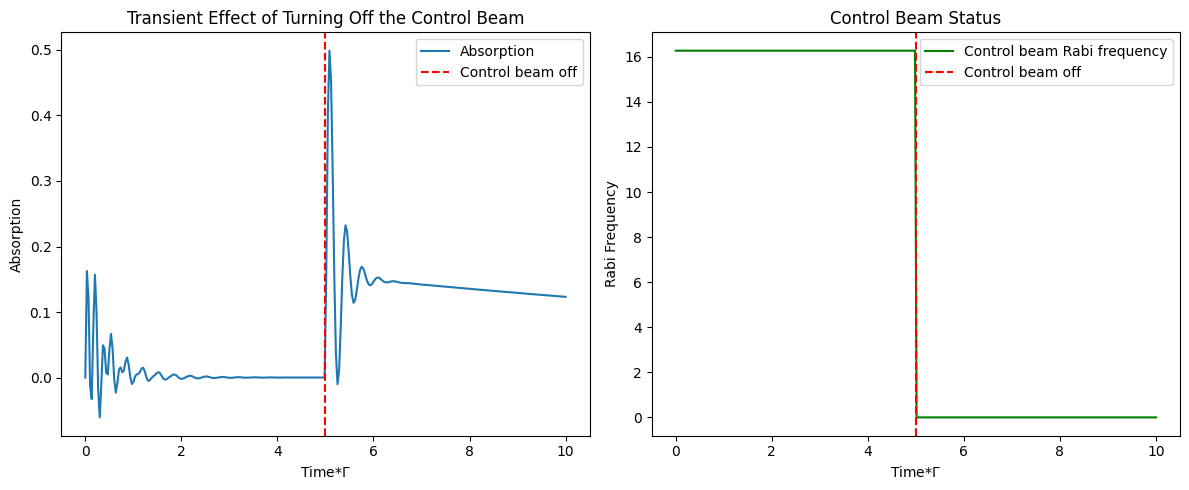

In [ ]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Simulation parameters
Delta_b = 0  # Probe field detuning
Delta_c = 0  # Control field detuning

# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data and guessing the decoherence of the ground state
Gamma_b = .1  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75  # 2pi MHz, Decay rate from |a> to |c>, control transition
gamma = 0.005   # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c>
ba = tensor(state_b * state_a.dag())  # |b><a>
ca = tensor(state_c * state_a.dag())  # |c><a>
cb = tensor(state_c * state_b.dag())  # |c><b>
bc = tensor(state_b * state_c.dag())  # |b><c>

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb    # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc    # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = (cc + bb)/np.sqrt(2)

# Time points for the simulation
tlist = np.linspace(0, 10, 300)
t_pump_off = 5.0  # Time at which the pump field is turned off

# Time-dependent Hamiltonian
def H_t(t, args):
    Omega_c_t = Omega_c if t < t_pump_off else 0
    return (Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Delta_c * (aa - cc) + Delta_b * (aa - bb))

# Solve the master equation
result = mesolve(H_t, rho0, tlist, collapse, [ba])

# Extract the results
probe_coherence = result.expect[0]
absorption = -np.imag(probe_coherence)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot absorption
ax[0].plot(tlist, absorption, label="Absorption")
ax[0].axvline(t_pump_off, color='r', linestyle='--', label="Control beam off")
ax[0].set_xlabel('Time*$\Gamma$')
ax[0].set_ylabel('Absorption')
ax[0].legend()
ax[0].set_title('Transient Effect of Turning Off the Control Beam')

# Plot control beam status
control_beam_status = np.array([Omega_c if t < t_pump_off else 0 for t in tlist])
ax[1].plot(tlist, control_beam_status, label="Control beam Rabi frequency", color='g')
ax[1].axvline(t_pump_off, color='r', linestyle='--', label="Control beam off")
ax[1].set_xlabel('Time*$\Gamma$')
ax[1].set_ylabel('Rabi Frequency')
ax[1].legend()
ax[1].set_title('Control Beam Status')

plt.tight_layout()
plt.show()


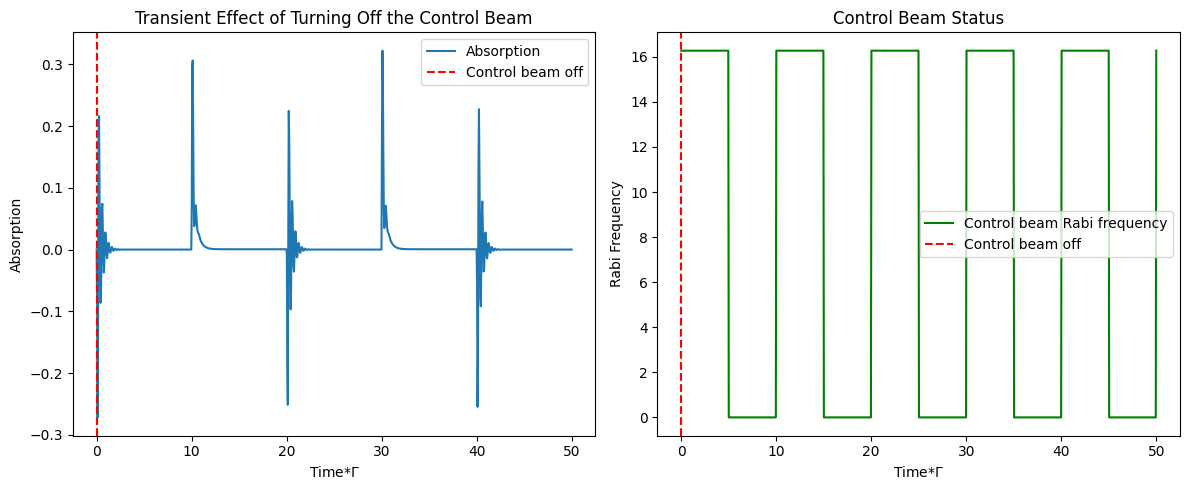

In [ ]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Simulation parameters
Delta_b = 0  # Probe field detuning
Delta_c = 0  # Control field detuning

# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius) / (2 * np.pi * 1e6)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data and guessing the decoherence of the ground state
Gamma_b = 5.75  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75  # 2pi MHz, Decay rate from |a> to |c>, control transition
gamma = 0.005   # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b>
cc = tensor(state_c * state_c.dag())  # |c><c>
ba = tensor(state_b * state_a.dag())  # |b><a>
ca = tensor(state_c * state_a.dag())  # |c><a>
cb = tensor(state_c * state_b.dag())  # |c><b>
bc = tensor(state_b * state_c.dag())  # |b><c>

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb    # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc    # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = cc

# Time points for the simulation
tlist = np.linspace(0, 50, 1000)

# Periodically turn the control beam on and off
def H_t(t, args):
    period = 20.0
    duty_cycle = 0.5
    Omega_c_t = Omega_c if (t % period) < (duty_cycle * period) else 0
    return (Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Delta_c * (aa - cc) + Delta_b * (aa - bb))

# Solve the master equation
result = mesolve(H_t, rho0, tlist, collapse, [ba])

# Extract the results
probe_coherence = result.expect[0]
absorption = -np.imag(probe_coherence)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot absorption
ax[0].plot(tlist, absorption, label="Absorption")
ax[0].axvline(tlist[0], color='r', linestyle='--', label="Control beam off")
ax[0].set_xlabel('Time*$\Gamma$')
ax[0].set_ylabel('Absorption')
ax[0].legend()
ax[0].set_title('Transient Effect of Turning Off the Control Beam')

# Plot control beam status
control_beam_status = np.array([Omega_c if (t % 10) < 5 else 0 for t in tlist])
ax[1].plot(tlist, control_beam_status, label="Control beam Rabi frequency", color='g')
ax[1].axvline(tlist[0], color='r', linestyle='--', label="Control beam off")
ax[1].set_xlabel('Time*$\Gamma$')
ax[1].set_ylabel('Rabi Frequency')
ax[1].legend()
ax[1].set_title('Control Beam Status')

plt.tight_layout()
plt.show()


# Scraps

In [ ]:
# Scarps #
# EIT with Doppler Broadening #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)    # state |a>
state_c = basis(3, 2)    # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85*1e-12         # F/m
hbar = 1.05*1e-34        # J.s
dipole = 3.58*1e-29      # C.m
c = 2.99792458e8         # m/s
power_c = 3e-3           # Power for Control beam
power_b = 1e-3           # Power for probe beam
radius = 2e-3            # Beam radius

Omega_c = (dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius  # Rabi frequency for |a> <-> |c>, Control
Omega_b = (dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius  # Rabi frequency for |a> <-> |b>, probe

# Simulation parameters
Delta_b = np.linspace(-100, 100, 300)  # Probe field detuning
Delta_c = 0                          # Control field detuning
gamma = 1 * 2 * np.pi * 1e6          # Coherence decay rate (b<->c)
temp = 80                            # Temperature of the cell (°C)
w_b = (377.10746338*1e12 - 4.271676631815181*1e9) * (2*np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338*1e12 + 2.563005979089109*1e9) * (2*np.pi)  # Angular Freq of control F=2

# Decay rates from Steck data
Gamma_b = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |c>, control transition

# Wavevectors, Direction of the beam
k_b = w_b / c  # Wave number of probe
k_c = w_c / c  # Wave number of control

# Number density calculation from the Clausius-Clapeyron relation
Tk = temp + 273.15  # Temperature in K
if Tk < 39.48 + 273.15:
    Pressure = 10**(2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10**(2.881 + 4.312 - 4040 / Tk)
RBolt = 8.314      # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)

# Define Maxwell-Boltzmann distribution
def MaxwellBoltzmann(velocities, T):
    KBoltz = 1.380649e-23  # JK^-1
    massRb87 = 1.44316089500*1e-25  # kg Rb87
    sigmaMB = np.sqrt(KBoltz * T / massRb87)
    return np.sqrt(1 / (2 * np.pi * sigmaMB)) * np.exp(-0.5 * (velocities**2) / (sigmaMB**2))

Velocity_dis = np.linspace(-200, 200, 100)
MBD = MaxwellBoltzmann(Velocity_dis, Tk)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a|
ca = tensor(state_c * state_a.dag())  # |c><a|
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb    # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc    # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = cc  # All atoms initially in state |c>

probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
Deltas = [0, 0]
ks = [k_b, k_c]

# Calculate the steady-state coherence for each velocity and detuning
for i, v in enumerate(Velocity_dis):
    for j, p in enumerate(Delta_b):
        Deltas[0] = p
        Deltas_eff = np.zeros(len(Deltas))
        for k in range(len(Deltas)):
            Deltas_eff[k] = Deltas[k] + (ks[k] * v) * 1e-6  # to convert to MHz
        H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Deltas_eff[0] * (aa - bb) + Deltas_eff[1] * (aa - cc))
        result = steadystate(H, collapse)
        probe_coherence[i, j] = np.imag(expect(ba.dag(), result))

# Perform the integration using the rectangle rule
int_manual = np.zeros(len(Delta_b))
pdf = MaxwellBoltzmann(Velocity_dis, Tk)
vel_step = Velocity_dis[1] - Velocity_dis[0]

for i in range(len(Delta_b)):
    p_slice = probe_coherence[:, i]
    weighted = p_slice * pdf * vel_step
    int_manual[i] = np.sum(weighted)

# Plotting the results
plt.title("EIT with and without Doppler Broadening")
plt.plot(Delta_b, int_manual, label='Doppler averaged')
plt.xlabel('Probe Field Detuning/$\Gamma$')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [ ]:
# Scarps #
# EIT with Doppler Broadening #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)    # state |a>
state_c = basis(3, 2)    # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85*1e-12         # F/m
hbar = 1.05*1e-34        # J.s
dipole = 3.58*1e-29      # C.m
c = 2.99792458e8         # m/s
power_c = 3e-3           # Power for Control beam
power_b = 1e-3           # Power for probe beam
radius = 2e-3            # Beam radius

Omega_c = (dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius  # Rabi frequency for |a> <-> |c>, Control
Omega_b = (dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius  # Rabi frequency for |a> <-> |b>, probe

# Simulation parameters
Delta_b = np.linspace(-50, 50, 300)  # Probe field detuning
Delta_c = 0                          # Control field detuning
gamma = 1 * 2 * np.pi * 1e6          # Coherence decay rate (b<->c)
temp = 80                            # Temperature of the cell (°C)
w_b = (377.10746338*1e12 - 4.271676631815181*1e9) * (2*np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338*1e12 + 2.563005979089109*1e9) * (2*np.pi)  # Angular Freq of control F=2

# Decay rates from Steck data
Gamma_b = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |c>, control transition

# Wavevectors, Direction of the beam
k_b = w_b / c  # Wave number of probe
k_c = w_c / c  # Wave number of control

# Number density calculation from the Clausius-Clapeyron relation
Tk = temp + 273.15  # Temperature in K
if Tk < 39.48 + 273.15:
    Pressure = 10**(2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10**(2.881 + 4.312 - 4040 / Tk)
RBolt = 8.314      # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)

# Define Maxwell-Boltzmann distribution
def MaxwellBoltzmann(velocities, T):
    KBoltz = 1.380649e-23  # JK^-1
    massRb87 = 1.44316089500*1e-25  # kg Rb87
    sigmaMB = np.sqrt(KBoltz * T / massRb87)
    return np.sqrt(1 / (2 * np.pi * sigmaMB)) * np.exp(-0.5 * (velocities**2) / (sigmaMB**2))

Velocity_dis = np.linspace(-200, 200, 100)
MBD = MaxwellBoltzmann(Velocity_dis, Tk)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a|
ca = tensor(state_c * state_a.dag())  # |c><a|
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb    # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc    # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = cc  # All atoms initially in state |c>

# Calculate the EIT absorption profile without Doppler broadening
chi = []

for i in Delta_b:
    H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) +
         Delta_c * (aa - cc) + i * (aa - bb))
    result = steadystate(H, collapse)
    chi.append(expect(ba.dag(), result))

# Calculate the EIT absorption profile with Doppler broadening
probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)), dtype=complex)
Deltas = [0, 0]
ks = [k_b, k_c]

# Calculate the steady-state coherence for each velocity and detuning
for i, v in enumerate(Velocity_dis):
    for j, p in enumerate(Delta_b):
        Deltas[0] = p
        Deltas_eff = np.zeros(len(Deltas))
        for k in range(len(Deltas)):
            Deltas_eff[k] = Deltas[k] + (ks[k] * v) * 1e-6  # to convert to MHz
        H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) +
             Deltas_eff[0] * (aa - bb) + Deltas_eff[1] * (aa - cc))
        result = steadystate(H, collapse)
        probe_coherence[i, j] = expect(ba.dag(), result)

# Perform the integration using the rectangle rule
int_manual = np.zeros(len(Delta_b))
pdf = MaxwellBoltzmann(Velocity_dis, Tk)
vel_step = Velocity_dis[1] - Velocity_dis[0]

for i in range(len(Delta_b)):
    p_slice = np.imag(probe_coherence[:, i])  # Use the imaginary part for absorption
    weighted = p_slice * pdf * vel_step
    int_manual[i] = np.sum(weighted)

# Plotting the results
plt.title("EIT with and without Doppler Broadening")
#plt.plot(Delta_b, int_manual, label='Doppler averaged')
plt.plot(Delta_b, np.imag(chi), label='Without Doppler Broadening')
plt.xlabel('Probe Field Detuning/$\Gamma$')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


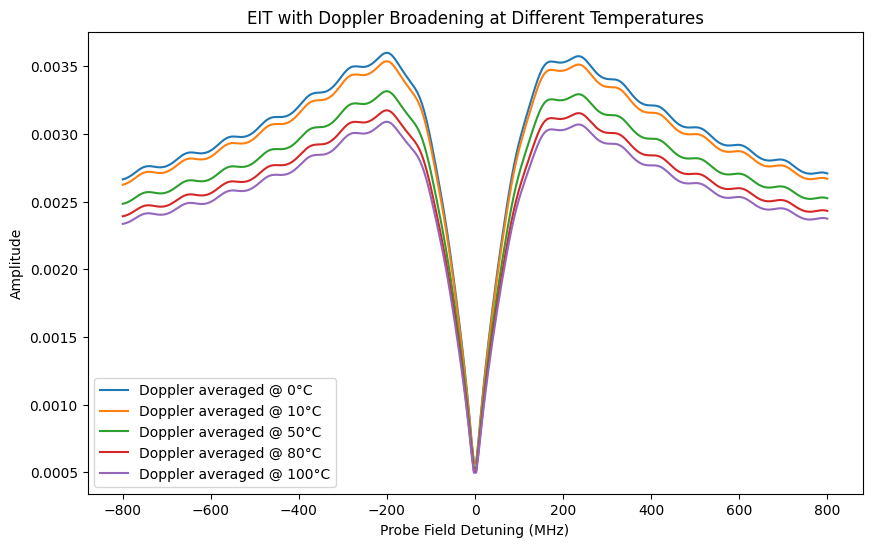

In [ ]:
# Sweeping over the temp #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simpson

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85e-12  # F/m
hbar = 1.05e-34  # J.s
dippole = 3.58e-29  # C.m
c = 2.99792458e8  # m/s
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3  # of the beam
Omega_c = (dippole / np.sqrt(eps * c * hbar ** 2 * np.pi)) * np.sqrt(power_c) / radius  # Rabi frequency for |a> <-> |c>, Control
Omega_b = (dippole / np.sqrt(eps * c * hbar ** 2 * np.pi)) * np.sqrt(power_b) / radius  # Rabi frequency for |a> <-> |b>, probe

# Simulation parameters
Delta_b = np.linspace(-800e6, 800e6, 300)  # Probe field detuning
Delta_c = 0  # Control field detuning
length = 1e-2  # Length of the cell
gamma = 1 * 2 * np.pi * 1e6  # Decay rate from |b> to |c>, coherence decay rate (b->c)
temps = [0, 10, 50, 80, 100]  # C, of the cell
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Angular Freq of control F=2
lmda_b = (2 * np.pi) * c / w_b  # Wavelength of the probe
lmda_c = (2 * np.pi) * c / w_c  # Wavelength of the control

# Decay rates from steck data
Gamma_b = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |c>, control transition

# Wavevector, Direction of the beam
k_b = w_b / c  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c / c  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Define Maxwell-Boltzmann distribution
def MaxwellBoltzman(velocities, T):
    KBoltz = 1.380649e-23  # J/K
    massRb87 = 1.44316089500e-25  # kg Rb87
    sigmaMB = np.sqrt(KBoltz * T / massRb87)
    return np.exp(-0.5 * (velocities ** 2) / (sigmaMB ** 2)) / (sigmaMB * np.sqrt(2 * np.pi))

Velocity_dis = np.linspace(-200, 200, 100)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a>
ca = tensor(state_c * state_a.dag())  # |c><a>
cb = tensor(state_c * state_b.dag())  # |c><b>
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
c_c = 1
c_b = 0
c_a = 0
rho0 = c_c * cc + c_b * bb + c_a * aa

plt.figure(figsize=(10, 6))

for T in temps:
    # Number density Calc from the Clausius-Clapeyron relation
    Tk = T + 273.15  # K
    if Tk < 39.48 + 273.15:
        Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
    else:
        Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)
    RBolt = 8.314  # J/mol.K
    Nav = 6.02214076e23  # 1/mol
    numberDensity = Pressure * Nav / (RBolt * Tk)

    MBD = MaxwellBoltzman(Velocity_dis, Tk)

    probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
    Deltas = [0, 0]
    ks = [k_b, k_c]

    # Considering both Ks are equal
    for i, v in enumerate(Velocity_dis):
        for j, p in enumerate(Delta_b):
            Deltas[0] = p
            # For each value of velocity, calculate the effective detuning
            Deltas_eff = np.zeros(len(Deltas))
            for k in range(len(Deltas)):
                Deltas_eff[k] = Deltas[k] + (ks[k] * v)
            H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Deltas_eff[1] * (aa - cc) + Deltas_eff[0] * (aa - bb))
            result = steadystate(H, collapse)
            probe_coherence[i, j] = np.imag(expect(ba.dag(), result))

    int_manual = np.zeros(len(Delta_b))
    pdf = MaxwellBoltzman(Velocity_dis, Tk)

    # Perform the integration using Simpson's rule.
    for i in range(len(Delta_b)):
        p_slice = probe_coherence[:, i]
        weighted = p_slice * pdf
        int_manual[i] = simpson(weighted, Velocity_dis)

    plt.plot(Delta_b / 1e6, int_manual, label=f'Doppler averaged @ {T}°C')

plt.xlabel('Probe Field Detuning (MHz)')
plt.ylabel('Amplitude')
plt.title("EIT with Doppler Broadening at Different Temperatures")
plt.legend()
plt.show()


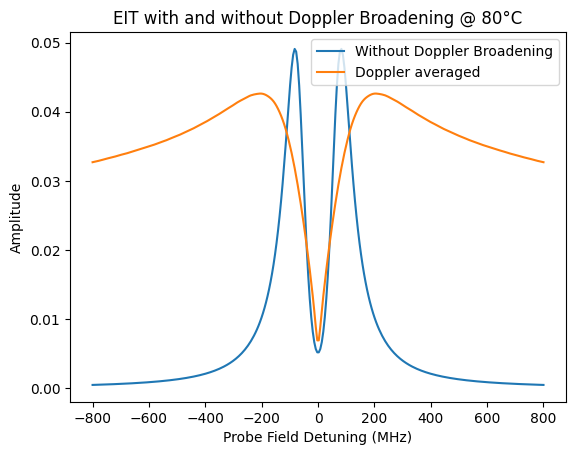

In [ ]:
# Modified Doppler #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Constants
eps = 8.85e-12  # F/m
hbar = 1.05e-34  # J.s
dipole = 3.58e-29  # C.m
c = 2.99792458e8  # m/s
gamma = 1 * 2 * np.pi * 1e6  # Decay rate (Hz)
temperature = 80  # Celsius
length = 1e-2  # Length of the cell (m)
kB = 1.380649e-23  # Boltzmann constant (J/K)
massRb87 = 1.44316089500e-25  # kg (Rubidium-87 mass)

# Convert temperature to Kelvin
Tk = temperature + 273.15  # K

# Frequencies (Hz)
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Probe
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Control

# Wavelengths (m)
lambda_b = (2 * np.pi) * c / w_b
lambda_c = (2 * np.pi) * c / w_c

# Rabi frequencies (Hz)
power_c = 3e-3  # Power for Control beam (W)
power_b = 1e-3  # Power for probe beam (W)
radius = 2e-3  # Beam radius (m)
Omega_c = (dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius
Omega_b = (dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius

# Detunings (Hz)
Delta_b = np.linspace(-800e6, 800e6, 300)  # Probe field detuning
Delta_c = 0  # Control field detuning

# Decay rates (Hz)
Gamma_b = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |b>
Gamma_c = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |c>

# Wavevectors (1/m)
k_b = w_b / c  # Probe
k_c = w_c / c  # Control

# Number density calculation from the Clausius-Clapeyron relation
if Tk < 39.48 + 273.15:
    Pressure = 10**(2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10**(2.881 + 4.312 - 4040 / Tk)

RBolt = 8.314  # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)

# Define Maxwell-Boltzmann distribution
def MaxwellBoltzmann(velocities, T):
    sigmaMB = np.sqrt(kB * T / massRb87)
    return np.sqrt(1 / (2 * np.pi * sigmaMB)) * np.exp(-0.5 * (velocities**2) / (sigmaMB**2))

# Define basis states
state_b = basis(3, 0)  # |b>
state_a = basis(3, 1)  # |a>
state_c = basis(3, 2)  # |c>

# Define operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a|
ca = tensor(state_c * state_a.dag())  # |c><a|
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # |a> -> |c>
c2 = np.sqrt(Gamma_c) * ba  # |a> -> |b>
c3 = np.sqrt(gamma) * cb  # |c> -> |b>
c4 = np.sqrt(gamma) * bc  # |b> -> |c>
collapse = [c1, c2, c3, c4]

# Initial state (all population in |c>)
rho0 = cc

# Velocities for Doppler broadening
Velocity_dis = np.linspace(-200, 200, 100)
MBD = MaxwellBoltzmann(Velocity_dis, Tk)

# Storage arrays
probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
Deltas = [0, 0]
ks = [k_b, k_c]

# Calculate probe coherence for different velocities
for i, v in enumerate(Velocity_dis):
    for j, p in enumerate(Delta_b):
        Deltas[0] = p
        # Effective detuning for each velocity
        Deltas_eff = [Delta + (k * v) for Delta, k in zip(Deltas, ks)]
        H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) +
             Deltas_eff[1] * (aa - cc) + Deltas_eff[0] * (aa - bb))
        result = steadystate(H, collapse)
        probe_coherence[i, j] = np.imag(expect(ba.dag(), result))

# Perform the integration using the rectangle rule
int_manual = np.zeros(len(Delta_b))
pdf = MaxwellBoltzmann(Velocity_dis, Tk)
vel_step = Velocity_dis[1] - Velocity_dis[0]

for i in range(len(Delta_b)):
    p_slice = probe_coherence[:, i]
    weighted = p_slice * pdf * vel_step
    int_manual[i] = np.sum(weighted)

# Calculate without Doppler broadening
chi = []
for i in Delta_b:
    H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) +
         Delta_c * (aa - cc) + i * (aa - bb))
    result = steadystate(H, collapse)
    chi.append(expect(ba.dag(), result))

# Plotting
plt.title("EIT with and without Doppler Broadening @ 80°C")
plt.plot(Delta_b / 1e6, np.imag(chi), label="Without Doppler Broadening")
plt.plot(Delta_b / 1e6, int_manual, label='Doppler averaged')
plt.xlabel('Probe Field Detuning (MHz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


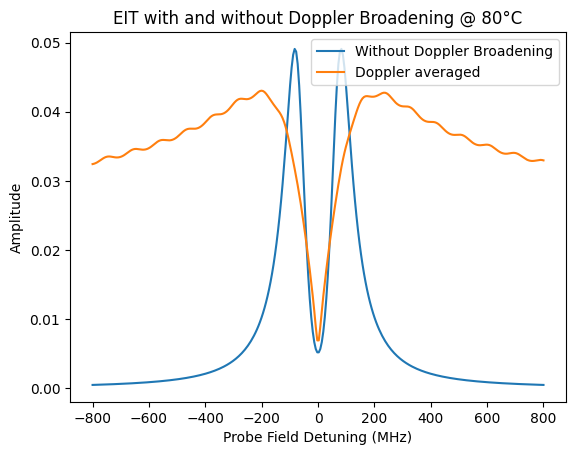

In [ ]:
# USing Simpson integral for Doppler braodening #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simpson

# Constants
eps = 8.85e-12  # F/m
hbar = 1.05e-34  # J.s
dipole = 3.58e-29  # C.m
c = 2.99792458e8  # m/s
gamma = 1 * 2 * np.pi * 1e6  # Decay rate (Hz)
temperature = 80  # Celsius
length = 1e-2  # Length of the cell (m)
kB = 1.380649e-23  # Boltzmann constant (J/K)
massRb87 = 1.44316089500e-25  # kg (Rubidium-87 mass)

# Convert temperature to Kelvin
Tk = temperature + 273.15  # K

# Frequencies (Hz)
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Probe
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Control

# Wavelengths (m)
lambda_b = (2 * np.pi) * c / w_b
lambda_c = (2 * np.pi) * c / w_c

# Rabi frequencies (Hz)
power_c = 3e-3  # Power for Control beam (W)
power_b = 1e-3  # Power for probe beam (W)
radius = 2e-3  # Beam radius (m)
Omega_c = (dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius
Omega_b = (dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius

# Detunings (Hz)
Delta_b = np.linspace(-800e6, 800e6, 300)  # Probe field detuning
Delta_c = 0  # Control field detuning

# Decay rates (Hz)
Gamma_b = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |b>
Gamma_c = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |c>

# Wavevectors (1/m)
k_b = w_b / c  # Probe
k_c = w_c / c  # Control

# Number density calculation from the Clausius-Clapeyron relation
if Tk < 39.48 + 273.15:
    Pressure = 10**(2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10**(2.881 + 4.312 - 4040 / Tk)

RBolt = 8.314  # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)

# Define Maxwell-Boltzmann distribution
def MaxwellBoltzmann(velocities, T):
    sigmaMB = np.sqrt(kB * T / massRb87)
    return np.sqrt(1 / (2 * np.pi * sigmaMB)) * np.exp(-0.5 * (velocities**2) / (sigmaMB**2))

# Define basis states
state_b = basis(3, 0)  # |b>
state_a = basis(3, 1)  # |a>
state_c = basis(3, 2)  # |c>

# Define operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a>
ca = tensor(state_c * state_a.dag())  # |c><a>
cb = tensor(state_c * state_b.dag())  # |c><b>
bc = tensor(state_b * state_c.dag())  # |b><c>

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # |a> -> |c>
c2 = np.sqrt(Gamma_c) * ba  # |a> -> |b>
c3 = np.sqrt(gamma) * cb  # |c> -> |b>
c4 = np.sqrt(gamma) * bc  # |b> -> |c>
collapse = [c1, c2, c3, c4]

# Initial state (all population in |c>)
rho0 = cc

# Velocities for Doppler broadening
Velocity_dis = np.linspace(-200, 200, 100)
MBD = MaxwellBoltzmann(Velocity_dis, Tk)

# Storage arrays
probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
Deltas = [0, 0]
ks = [k_b, k_c]

# Calculate probe coherence for different velocities
for i, v in enumerate(Velocity_dis):
    for j, p in enumerate(Delta_b):
        Deltas[0] = p
        # Effective detuning for each velocity
        Deltas_eff = [Delta + (k * v) for Delta, k in zip(Deltas, ks)]
        H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) +
             Deltas_eff[1] * (aa - cc) + Deltas_eff[0] * (aa - bb))
        result = steadystate(H, collapse)
        probe_coherence[i, j] = np.imag(expect(ba.dag(), result))

# Perform the integration using Simpson's rule
int_manual = np.zeros(len(Delta_b))
pdf = MaxwellBoltzmann(Velocity_dis, Tk)

for i in range(len(Delta_b)):
    p_slice = probe_coherence[:, i]
    weighted = p_slice * pdf
    int_manual[i] = simpson(weighted, Velocity_dis)

# Calculate without Doppler broadening
chi = []
for i in Delta_b:
    H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) +
         Delta_c * (aa - cc) + i * (aa - bb))
    result = steadystate(H, collapse)
    chi.append(expect(ba.dag(), result))

# Plotting
plt.title("EIT with and without Doppler Broadening @ 80°C")
plt.plot(Delta_b / 1e6, np.imag(chi), label="Without Doppler Broadening")
plt.plot(Delta_b / 1e6, int_manual, label='Doppler averaged')
plt.xlabel('Probe Field Detuning (MHz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


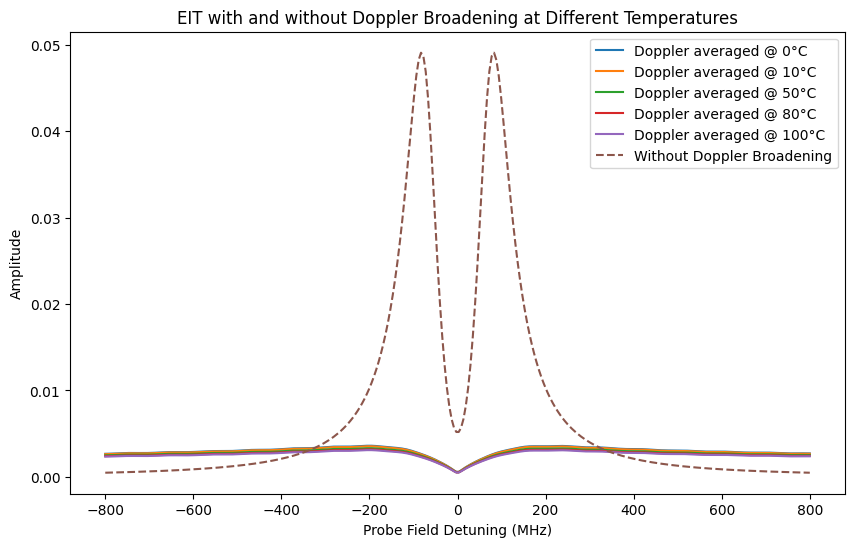

In [ ]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simpson

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85e-12  # F/m
hbar = 1.05e-34  # J.s
dippole = 3.58e-29  # C.m
c = 2.99792458e8  # m/s
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3  # of the beam
Omega_c = (dippole / np.sqrt(eps * c * hbar ** 2 * np.pi)) * np.sqrt(power_c) / radius  # Rabi frequency for |a> <-> |c>, Control
Omega_b = (dippole / np.sqrt(eps * c * hbar ** 2 * np.pi)) * np.sqrt(power_b) / radius  # Rabi frequency for |a> <-> |b>, probe

# Simulation parameters
Delta_b = np.linspace(-800e6, 800e6, 300)  # Probe field detuning
Delta_c = 0  # Control field detuning
length = 1e-2  # Length of the cell
gamma = 1 * 2 * np.pi * 1e6  # Decay rate from |b> to |c>, coherence decay rate (b->c)
temps = [0, 10, 50, 80, 100]  # C, of the cell
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Angular Freq of control F=2
lmda_b = (2 * np.pi) * c / w_b  # Wavelength of the probe
lmda_c = (2 * np.pi) * c / w_c  # Wavelength of the control

# Decay rates from steck data
Gamma_b = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |c>, control transition

# Wavevector, Direction of the beam
k_b = w_b / c  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c / c  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Define Maxwell-Boltzmann distribution
def MaxwellBoltzman(velocities, T):
    KBoltz = 1.380649e-23  # J/K
    massRb87 = 1.44316089500e-25  # kg Rb87
    sigmaMB = np.sqrt(KBoltz * T / massRb87)
    return np.exp(-0.5 * (velocities ** 2) / (sigmaMB ** 2)) / (sigmaMB * np.sqrt(2 * np.pi))

Velocity_dis = np.linspace(-200, 200, 100)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a>
ca = tensor(state_c * state_a.dag())  # |c><a>
cb = tensor(state_c * state_b.dag())  # |c><b>
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
c_c = 1
c_b = 0
c_a = 0
rho0 = c_c * cc + c_b * bb + c_a * aa

plt.figure(figsize=(10, 6))

for T in temps:
    # Number density Calc from the Clausius-Clapeyron relation
    Tk = T + 273.15  # K
    if Tk < 39.48 + 273.15:
        Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
    else:
        Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)
    RBolt = 8.314  # J/mol.K
    Nav = 6.02214076e23  # 1/mol
    numberDensity = Pressure * Nav / (RBolt * Tk)

    MBD = MaxwellBoltzman(Velocity_dis, Tk)

    probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
    Deltas = [0, 0]
    ks = [k_b, k_c]

    # Considering both Ks are equal
    for i, v in enumerate(Velocity_dis):
        for j, p in enumerate(Delta_b):
            Deltas[0] = p
            # For each value of velocity, calculate the effective detuning
            Deltas_eff = np.zeros(len(Deltas))
            for k in range(len(Deltas)):
                Deltas_eff[k] = Deltas[k] + (ks[k] * v)
            H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Deltas_eff[1] * (aa - cc) + Deltas_eff[0] * (aa - bb))
            result = steadystate(H, collapse)
            probe_coherence[i, j] = np.imag(expect(ba.dag(), result))

    int_manual = np.zeros(len(Delta_b))
    pdf = MaxwellBoltzman(Velocity_dis, Tk)

    # Perform the integration using Simpson's rule.
    for i in range(len(Delta_b)):
        p_slice = probe_coherence[:, i]
        weighted = p_slice * pdf
        int_manual[i] = simpson(weighted, Velocity_dis)

    plt.plot(Delta_b / 1e6, int_manual, label=f'Doppler averaged @ {T}°C')

# Non-Doppler broadened for comparison
chi = []
for i in Delta_b:
    H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Delta_c * (aa - cc) + i * (aa - bb))
    result = steadystate(H, collapse)
    chi.append(expect(ba.dag(), result))

plt.plot(Delta_b / 1e6, np.imag(chi), label='Without Doppler Broadening', linestyle='--')

plt.xlabel('Probe Field Detuning (MHz)')
plt.ylabel('Amplitude')
plt.title("EIT with and without Doppler Broadening at Different Temperatures")
plt.legend()
plt.show()


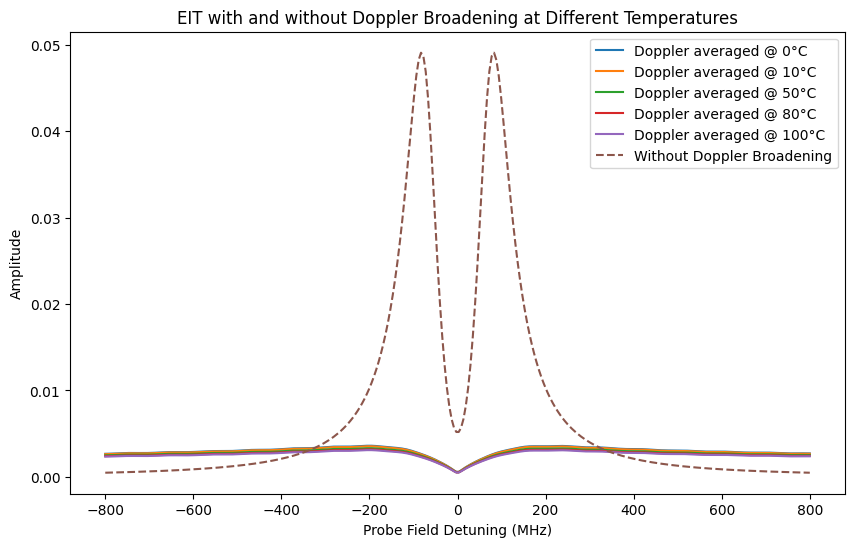

In [ ]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simpson

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85e-12  # F/m
hbar = 1.05e-34  # J.s
dippole = 3.58e-29  # C.m
c = 2.99792458e8  # m/s
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3  # of the beam
Omega_c = (dippole / np.sqrt(eps * c * hbar ** 2 * np.pi)) * np.sqrt(power_c) / radius  # Rabi frequency for |a> <-> |c>, Control
Omega_b = (dippole / np.sqrt(eps * c * hbar ** 2 * np.pi)) * np.sqrt(power_b) / radius  # Rabi frequency for |a> <-> |b>, probe

# Simulation parameters
Delta_b = np.linspace(-800e6, 800e6, 300)  # Probe field detuning
Delta_c = 0  # Control field detuning
length = 1e-2  # Length of the cell
gamma = 1 * 2 * np.pi * 1e6  # Decay rate from |b> to |c>, coherence decay rate (b->c)
temps = [0, 10, 50, 80, 100]  # C, of the cell
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Angular Freq of control F=2
lmda_b = (2 * np.pi) * c / w_b  # Wavelength of the probe
lmda_c = (2 * np.pi) * c / w_c  # Wavelength of the control

# Decay rates from steck data
Gamma_b = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |c>, control transition

# Wavevector, Direction of the beam
k_b = w_b / c  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c / c  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Define Maxwell-Boltzmann distribution
def MaxwellBoltzman(velocities, T):
    KBoltz = 1.380649e-23  # J/K
    massRb87 = 1.44316089500e-25  # kg Rb87
    sigmaMB = np.sqrt(KBoltz * T / massRb87)
    return np.exp(-0.5 * (velocities ** 2) / (sigmaMB ** 2)) / (sigmaMB * np.sqrt(2 * np.pi))

Velocity_dis = np.linspace(-200, 200, 100)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a>
bb = tensor(state_b * state_b.dag())  # |b><b>
cc = tensor(state_c * state_c.dag())  # |c><c>
ba = tensor(state_b * state_a.dag())  # |b><a>
ca = tensor(state_c * state_a.dag())  # |c><a>
cb = tensor(state_c * state_b.dag())  # |c><b>
bc = tensor(state_b * state_c.dag())  # |b><c>

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
c_c = 1
c_b = 0
c_a = 0
rho0 = c_c * cc + c_b * bb + c_a * aa

plt.figure(figsize=(10, 6))

for T in temps:
    # Number density Calc from the Clausius-Clapeyron relation
    Tk = T + 273.15  # K
    if Tk < 39.48 + 273.15:
        Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
    else:
        Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)
    RBolt = 8.314  # J/mol.K
    Nav = 6.02214076e23  # 1/mol
    numberDensity = Pressure * Nav / (RBolt * Tk)

    MBD = MaxwellBoltzman(Velocity_dis, Tk)

    probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
    Deltas = [0, 0]
    ks = [k_b, k_c]

    # Considering both Ks are equal
    for i, v in enumerate(Velocity_dis):
        for j, p in enumerate(Delta_b):
            Deltas[0] = p
            # For each value of velocity, calculate the effective detuning
            Deltas_eff = np.zeros(len(Deltas))
            for k in range(len(Deltas)):
                Deltas_eff[k] = Deltas[k] + (ks[k] * v)
            H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Deltas_eff[1] * (aa - cc) + Deltas_eff[0] * (aa - bb))
            result = steadystate(H, collapse)
            probe_coherence[i, j] = np.imag(expect(ba.dag(), result))

    int_manual = np.zeros(len(Delta_b))
    pdf = MaxwellBoltzman(Velocity_dis, Tk)

    # Perform the integration using Simpson's rule.
    for i in range(len(Delta_b)):
        p_slice = probe_coherence[:, i]
        weighted = p_slice * pdf
        int_manual[i] = simpson(weighted, Velocity_dis)

    plt.plot(Delta_b / 1e6, int_manual, label=f'Doppler averaged @ {T}°C')

# Non-Doppler broadened for comparison
chi = []
for i in Delta_b:
    H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Delta_c * (aa - cc) + i * (aa - bb))
    result = steadystate(H, collapse)
    chi.append(expect(ba.dag(), result))

plt.plot(Delta_b / 1e6, np.imag(chi), label='Without Doppler Broadening', linestyle='--')

plt.xlabel('Probe Field Detuning (MHz)')
plt.ylabel('Amplitude')
plt.title("EIT with and without Doppler Broadening at Different Temperatures")
plt.legend()
plt.show()


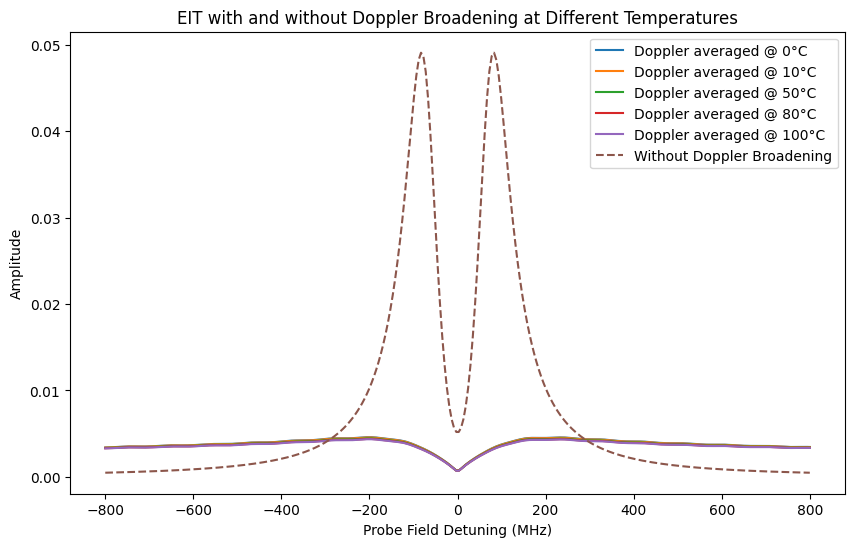

In [ ]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85e-12  # F/m
hbar = 1.05e-34  # J.s
dippole = 3.58e-29  # C.m
c = 2.99792458e8  # m/s
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3  # of the beam
Omega_c = (dippole / np.sqrt(eps * c * hbar ** 2 * np.pi)) * np.sqrt(power_c) / radius  # Rabi frequency for |a> <-> |c>, Control
Omega_b = (dippole / np.sqrt(eps * c * hbar ** 2 * np.pi)) * np.sqrt(power_b) / radius  # Rabi frequency for |a> <-> |b>, probe

# Simulation parameters
Delta_b = np.linspace(-800e6, 800e6, 300)  # Probe field detuning
Delta_c = 0  # Control field detuning
length = 1e-2  # Length of the cell
gamma = 1 * 2 * np.pi * 1e6  # Decay rate from |b> to |c>, coherence decay rate (b->c)
temps = [0, 10, 50, 80, 100]  # C, of the cell
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Angular Freq of control F=2
lmda_b = (2 * np.pi) * c / w_b  # Wavelength of the probe
lmda_c = (2 * np.pi) * c / w_c  # Wavelength of the control

# Decay rates from steck data
Gamma_b = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |c>, control transition

# Wavevector, Direction of the beam
k_b = w_b / c  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c / c  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Define Maxwell-Boltzmann distribution
def MaxwellBoltzman(velocities, T):
    KBoltz = 1.380649e-23  # J/K
    massRb87 = 1.44316089500e-25  # kg Rb87
    sigmaMB = np.sqrt(KBoltz * T / massRb87)
    v = np.exp(-0.5 * (velocities**2) / (sigmaMB**2)) / np.sqrt(2 * np.pi * sigmaMB**2)
    return v

Velocity_dis = np.linspace(-200, 200, 100)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a|
ca = tensor(state_c * state_a.dag())  # |c><a|
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
c_c = 1
c_b = 0
c_a = 0
rho0 = c_c * cc + c_b * bb + c_a * aa

plt.figure(figsize=(10, 6))

for T in temps:
    # Number density Calc from the Clausius-Clapeyron relation
    Tk = T + 273.15  # K
    if Tk < 39.48 + 273.15:
        Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
    else:
        Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)
    RBolt = 8.314  # J/mol.K
    Nav = 6.02214076e23  # 1/mol
    numberDensity = Pressure * Nav / (RBolt * Tk)

    MBD = MaxwellBoltzman(Velocity_dis, Tk)
    MBD_normalized = MBD / np.trapz(MBD, Velocity_dis)  # Normalize the distribution

    probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
    Deltas = [0, 0]
    ks = [k_b, k_c]

    # Considering both Ks are equal
    for i, v in enumerate(Velocity_dis):
        for j, p in enumerate(Delta_b):
            Deltas[0] = p
            # For each value of velocity, calculate the effective detuning
            Deltas_eff = np.zeros(len(Deltas))
            for k in range(len(Deltas)):
                Deltas_eff[k] = Deltas[k] + (ks[k] * v)
            H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Deltas_eff[1] * (aa - cc) + Deltas_eff[0] * (aa - bb))
            result = steadystate(H, collapse)
            probe_coherence[i, j] = np.imag(expect(ba.dag(), result))

    int_manual = np.zeros(len(Delta_b))

    # Perform the integration using Simpson's rule.
    for i in range(len(Delta_b)):
        p_slice = probe_coherence[:, i]
        weighted = p_slice * MBD_normalized
        int_manual[i] = simps(weighted, Velocity_dis)

    plt.plot(Delta_b / 1e6, int_manual, label=f'Doppler averaged @ {T}°C')

# Non-Doppler broadened for comparison
chi = []
for i in Delta_b:
    H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Delta_c * (aa - cc) + i * (aa - bb))
    result = steadystate(H, collapse)
    chi.append(expect(ba.dag(), result))

plt.plot(Delta_b / 1e6, np.imag(chi), label='Without Doppler Broadening', linestyle='--')

plt.xlabel('Probe Field Detuning (MHz)')
plt.ylabel('Amplitude')
plt.title("EIT with and without Doppler Broadening at Different Temperatures")
plt.legend()
plt.show()


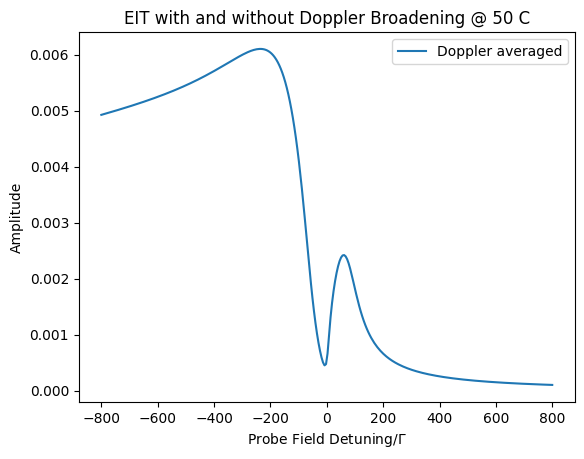

In [ ]:
# EIT with Doppler Broadening #
# Under construction #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np


# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)   # state |a>
state_c = basis(3, 2)    # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85*1e-12    # F/m
hbar = 1.05*1e-34   # J.s
dippole  = 3.58*1e-29   # C.m
c = 2.99792458e8 # m/s
power_c = 3e-3         # Power for Control beam
power_b = 1e-3         # Power for probe beam
radious = 2e-3         # of the beam
Omega_c = ((dippole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_c)/radious)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dippole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_b)/radious)  # Rabi frequency for |a> <-> |b>, probe

# Simulation parameters
Delta_b = np.linspace(-800*1e6,800*1e6,300)         # Probe field detuning
Delta_c = 0  # Control field detuning
length = 1e-2   # Length of the cell
gamma = 1 * 2*np.pi* 1e6   # Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 50 # C, of the cell
w_b = (377.10746338*1e12 -  4.271676631815181*1e9) * (2*np.pi)  #Angular Freq of probe F=1
w_c = (377.10746338*1e12 +  2.563005979089109*1e9) * (2*np.pi)  #Angular Freq of control F=2
lmda_b = (2*np.pi)*c/w_b # Wavelength of the probe
lmda_c = (2*np.pi)*c/w_c # Wavelength of the control


# Decay rates from steck data
Gamma_b = 5.75 * 2*np.pi* 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2*np.pi* 1e6  # Decay rate from |a> to |c>, control transition

# Wavevector, Direciton of the beam
k_b = w_b/c  # wave number of probe, beams are co-propagating, for counter propagation multipy by -1
k_c = w_c/c  # wave number of control, beams are co-propagating, for counter propagation multipy by -1

# Number density Calc from the Claussius-Clapyron relation
Tk = temp + 273.15 # K
if Tk < 39.48 + 273.15:
  Pressure = 10**(2.881 + 4.857 - 4215/Tk)
else:
  Pressure = 10**(2.881 + 4.312 - 4040/Tk)
RBolt = 8.314 #j/mol.k
Nav = 6.02214076e23 #1/mol
numberDensity = Pressure*Nav/(RBolt*Tk)


# Define Maxwell Boltzman distribution
def MaxwellBoltzman(velocities, T):
  KBoltz = 1.380649e-23 # JK^-1
  massRb87 = 1.44316089500*1e-25 #kg Rb87
  sigmaMB = np.sqrt(KBoltz * T / massRb87)
  return np.sqrt(1/(2*np.pi*sigmaMB))*np.exp(-0.5*(velocities**2)/(sigmaMB**2))

Velocity_dis = np.linspace(0,800,300)
MBD = MaxwellBoltzman(Velocity_dis, Tk)
MBD_normalized = MBD / np.trapz(MBD, Velocity_dis)  # Normalize the distribution

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())    # |b><b|
cc = tensor(state_c * state_c.dag())    # |c><c|
ba = tensor(state_b * state_a.dag())   # |b><a|
ca = tensor(state_c * state_a.dag())   # |c><a|
cb = tensor(state_c * state_b.dag())    # |c><b|
bc = tensor(state_b * state_c.dag())    # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb   # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc   # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
c_c = 1
c_b = 0
c_a = 0
rho0 = c_c*cc + c_b*bb + c_a*aa

rho_aa = []
rho_ab = []
rho_ba = []
chi = []


probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
Deltas = [0,0]
ks = [k_b, k_c]


for i, v in enumerate(Velocity_dis):
    for j, p in enumerate(Delta_b):
        Deltas[0] = p
        # For each value of velocity, calculate the effective detuning
        Deltas_eff = np.zeros(len(Deltas))
        for k in range(len(Deltas)):
            Deltas_eff[k] = Deltas[k]+(ks[k]*v)#*2*np.pi#*1e-6 # to convert to MHz
        H = (Omega_b*(ba+ba.dag()) + Omega_c*(ca+ca.dag()) + Deltas_eff[1]*(aa - cc) + Deltas_eff[0]*(aa - bb))
        result = steadystate(H, collapse)
        probe_coherence[i,j] = np.imag(expect(ba.dag(), result))
        #chi.append(expect(ba.dag(), result))

int_manual = np.zeros(len(Delta_b))
pdf = MaxwellBoltzman(Velocity_dis, Tk) #/ np.trapz(MBD, Velocity_dis)
vel_step = Velocity_dis[-1] - Velocity_dis[-2]

# Perform the integration using the rectangle rule.
for i in range(len(Delta_b)):
    p_slice = probe_coherence[:,i]
    weighted = p_slice*pdf*vel_step
    int_manual[i] = np.sum(weighted)



for i in Delta_b:
  H = (Omega_b*(ba+ba.dag()) + Omega_c*(ca+ca.dag()) + Delta_c*(aa - cc) + i*(aa - bb))

  result = steadystate(H, collapse)
  chi.append(expect(ba.dag(), result))

plt.title("EIT with and without Doppler Broadening @ 50 C")
#plt.plot(Delta_b, np.real(chi), label = "Dispersion Index")
#plt.plot(Delta_b/1e6, np.imag(chi), label = "Without Doppler Broadening")
plt.plot(Delta_b/1e6, int_manual, label = 'Doppler averaged')
#plt.plot(Delta_b, np.imag(chi), label = "Absorption")
plt.xlabel('Probe Field Detuning/$\Gamma$')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
Omega_c

NameError: name 'Omega_c' is not defined

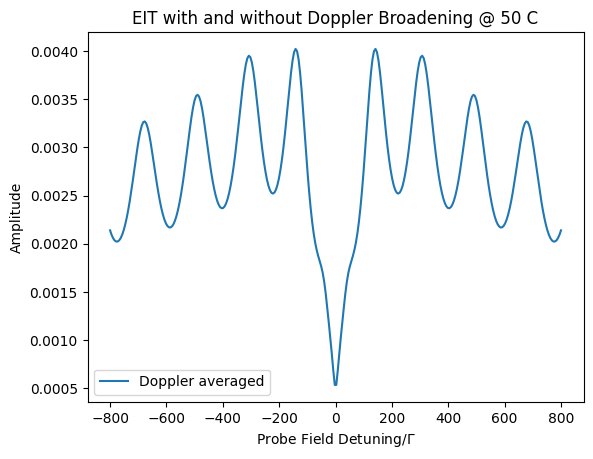

In [ ]:
# EIT with Doppler Broadening #
# Under construction #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants, stats, linalg

# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)   # state |a>
state_c = basis(3, 2)    # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85*1e-12    # F/m
hbar = 1.05*1e-34   # J.s
dippole  = 3.58*1e-29   # C.m
c = 2.99792458e8 # m/s
power_c = 3e-3         # Power for Control beam
power_b = 1e-3         # Power for probe beam
radious = 2e-3         # of the beam
Omega_c = ((dippole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_c)/radious)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dippole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_b)/radious)  # Rabi frequency for |a> <-> |b>, probe

# Simulation parameters
Delta_b = np.linspace(-800*1e6,800*1e6,300)         # Probe field detuning
Delta_c = 0  # Control field detuning
length = 1e-2   # Length of the cell
gamma = 1 * 2*np.pi* 1e6   # Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 50 # C, of the cell
w_b = (377.10746338*1e12 -  4.271676631815181*1e9) * (2*np.pi)  #Angular Freq of probe F=1
w_c = (377.10746338*1e12 +  2.563005979089109*1e9) * (2*np.pi)  #Angular Freq of control F=2
lmda_b = (2*np.pi)*c/w_b # Wavelength of the probe
lmda_c = (2*np.pi)*c/w_c # Wavelength of the control


# Decay rates from steck data
Gamma_b = 5.75 * 2*np.pi* 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2*np.pi* 1e6  # Decay rate from |a> to |c>, control transition

# Wavevector, Direciton of the beam
k_b = w_b/c  # wave number of probe, beams are co-propagating, for counter propagation multipy by -1
k_c = w_c/c  # wave number of control, beams are co-propagating, for counter propagation multipy by -1

# Number density Calc from the Claussius-Clapyron relation
Tk = temp + 273.15 # K
if Tk < 39.48 + 273.15:
  Pressure = 10**(2.881 + 4.857 - 4215/Tk)
else:
  Pressure = 10**(2.881 + 4.312 - 4040/Tk)
RBolt = 8.314 #j/mol.k
Nav = 6.02214076e23 #1/mol
numberDensity = Pressure*Nav/(RBolt*Tk)


# Another way
def MaxwellBoltzman(velocities, T):
    massRb87 = 1.44316089500*1e-25 #kg Rb87
    kb = constants.k #m**2 kg s**-2 K**-1
    sigma = np.sqrt((kb*T)/massRb87)
    return stats.norm(0, sigma).pdf(velocities)

Velocity_dis = np.linspace(-800,800,100)
MBD = MaxwellBoltzman(Velocity_dis, Tk)
MBD_normalized = MBD / np.trapz(MBD, Velocity_dis)  # Normalize the distribution


# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())    # |b><b|
cc = tensor(state_c * state_c.dag())    # |c><c|
ba = tensor(state_b * state_a.dag())   # |b><a|
ca = tensor(state_c * state_a.dag())   # |c><a|
cb = tensor(state_c * state_b.dag())    # |c><b|
bc = tensor(state_b * state_c.dag())    # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb   # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc   # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
c_c = 1
c_b = 0
c_a = 0
rho0 = c_c*cc + c_b*bb + c_a*aa

rho_aa = []
rho_ab = []
rho_ba = []
chi = []


probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
Deltas = [0,0]
ks = [k_b, k_c]


for i, v in enumerate(Velocity_dis):
    for j, p in enumerate(Delta_b):
        Deltas[0] = p
        # For each value of velocity, calculate the effective detuning
        Deltas_eff = np.zeros(len(Deltas))
        for k in range(len(Deltas)):
            Deltas_eff[k] = Deltas[k]+(ks[k]*v)#*2*np.pi#*1e-6 # to convert to MHz
        H = (Omega_b*(ba+ba.dag()) + Omega_c*(ca+ca.dag()) + Deltas_eff[1]*(aa - cc) + Deltas_eff[0]*(aa - bb))
        result = steadystate(H, collapse)
        probe_coherence[i,j] = np.imag(expect(ba.dag(), result))
        #chi.append(expect(ba.dag(), result))

int_manual = np.zeros(len(Delta_b))
pdf = MaxwellBoltzman(Velocity_dis, Tk) #/ np.trapz(MBD, Velocity_dis)
vel_step = Velocity_dis[-1] - Velocity_dis[-2]

# Perform the integration using the rectangle rule.
for i in range(len(Delta_b)):
    p_slice = probe_coherence[:,i]
    weighted = p_slice*pdf*vel_step
    int_manual[i] = np.sum(weighted)



for i in Delta_b:
  H = (Omega_b*(ba+ba.dag()) + Omega_c*(ca+ca.dag()) + Delta_c*(aa - cc) + i*(aa - bb))

  result = steadystate(H, collapse)
  chi.append(expect(ba.dag(), result))

plt.title("EIT with and without Doppler Broadening @ 50 C")
#plt.plot(Delta_b, np.real(chi), label = "Dispersion Index")
#plt.plot(Delta_b/1e6, np.imag(chi), label = "Without Doppler Broadening")
plt.plot(Delta_b/1e6, int_manual, label = 'Doppler averaged')
#plt.plot(Delta_b, np.imag(chi), label = "Absorption")
plt.xlabel('Probe Field Detuning/$\Gamma$')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

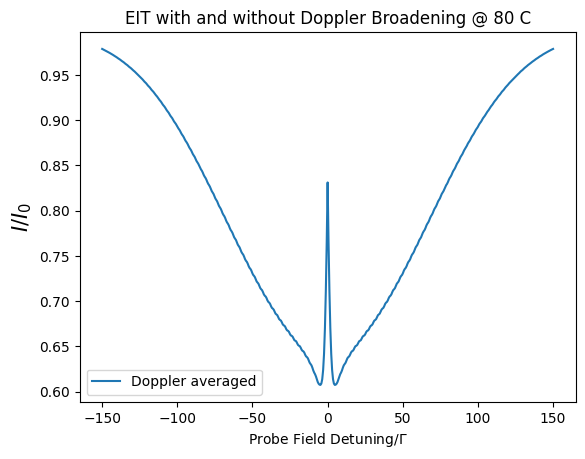

In [ ]:
# EIT with Doppler Broadening #
# Under construction #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np


# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)   # state |a>
state_c = basis(3, 2)    # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85*1e-12    # F/m
hbar = 1.05*1e-34   # J.s
dippole  = 2.5377*1e-29   # C.m
c = 2.99792458e8 # m/s
power_c = 3e-3         # Power for Control beam
power_b = 1e-3         # Power for probe beam
radious = 2e-3         # of the beam
Omega_c = ((dippole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_c)/radious)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dippole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_b)/radious)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data
Gamma_b = .1* 2*np.pi* 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2*np.pi* 1e6  # Decay rate from |a> to |c>, control transition

# Simulation parameters
Delta_b = np.linspace(-150*Gamma_c,150*Gamma_c,503)         # Probe field detuning
Delta_c = 0  # Control field detuning
length = 1e-2   # Length of the cell
gamma = 1 * 2*np.pi* 1e6   # Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80 # C, of the cell
w_b = (377.10746338*1e12 -  4.271676631815181*1e9) * (2*np.pi)  #Angular Freq of probe F=1
w_c = (377.10746338*1e12 +  2.563005979089109*1e9) * (2*np.pi)  #Angular Freq of control F=2
lmda_b = (2*np.pi)*c/w_b # Wavelength of the probe
lmda_c = (2*np.pi)*c/w_c # Wavelength of the control


# Wavevector, Direciton of the beam
k_b = w_b/c  # wave number of probe, beams are co-propagating, for counter propagation multipy by -1
k_c = w_c/c  # wave number of control, beams are co-propagating, for counter propagation multipy by -1

# Number density Calc from the Claussius-Clapyron relation
Tk = temp + 273.15 # K
if Tk < 39.48 + 273.15:
  Pressure = 10**(2.881 + 4.857 - 4215/Tk)
else:
  Pressure = 10**(2.881 + 4.312 - 4040/Tk)
RBolt = 8.314 #j/mol.k
Nav = 6.02214076e23 #1/mol
numberDensity = Pressure*Nav/(RBolt*Tk)


# Define Maxwell Boltzman distribution
def MaxwellBoltzman(velocities, T):
  KBoltz = 1.380649e-23 # JK^-1
  massRb87 = 1.44316089500*1e-25 #kg Rb87
  sigmaMB = np.sqrt(KBoltz * T / massRb87)
  return np.sqrt(1/(2*np.pi*sigmaMB))*np.exp(-0.5*(velocities**2)/(sigmaMB**2))

Velocity_dis = np.linspace(-1200,1200,1003)
MBD = MaxwellBoltzman(Velocity_dis, Tk)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())    # |b><b|
cc = tensor(state_c * state_c.dag())    # |c><c|
ba = tensor(state_b * state_a.dag())   # |b><a|
ca = tensor(state_c * state_a.dag())   # |c><a|
cb = tensor(state_c * state_b.dag())    # |c><b|
bc = tensor(state_b * state_c.dag())    # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb   # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc   # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
c_c = 1
c_b = 0
c_a = 0
rho0 = c_c*cc + c_b*bb + c_a*aa

rho_aa = []
rho_ab = []
rho_ba = []
chi = []


probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
Deltas = [0,0]
ks = [k_b, k_c]

# Considering both Ks are equal
for i, v in enumerate(Velocity_dis):
    for j, p in enumerate(Delta_b):
        Deltas[0] = p
        # For each value of velocity, calculate the effective detuning
        Deltas_eff = np.zeros(len(Deltas))
        for k in range(len(Deltas)):
            Deltas_eff[k] = Deltas[k]+(ks[k]*v)#*2*np.pi#*1e-6 # to convert to MHz
        H = (Omega_b*(ba+ba.dag()) + Omega_c*(ca+ca.dag()) + Deltas_eff[1]*(aa - cc) + Deltas_eff[0]*(aa - bb))
        result = steadystate(H, collapse)
        probe_coherence[i,j] = np.imag(expect(ba.dag(), result))
        #chi.append(expect(ba.dag(), result))

int_manual = np.zeros(len(Delta_b))
pdf = MaxwellBoltzman(Velocity_dis, Tk)
vel_step = Velocity_dis[-1] - Velocity_dis[-2]

# Perform the integration using the rectangle rule.
for i in range(len(Delta_b)):
    p_slice = probe_coherence[:,i]
    weighted = p_slice*pdf*vel_step
    int_manual[i] = np.sum(weighted)



for i in Delta_b:
  H = (Omega_b*(ba+ba.dag()) + Omega_c*(ca+ca.dag()) + Delta_c*(aa - cc) + i*(aa - bb))

  result = steadystate(H, collapse)
  chi.append(expect(ba.dag(), result))


# Extract the results
#probe_coherence = result.expect[0]
alpha = (k_b)*(numberDensity*dippole**2/(hbar*eps*Omega_b))*int_manual #np.imag(probe_coherence)
#dispersion = np.real(probe_coherence)
absorption = np.exp(-alpha*length)


plt.title("EIT with and without Doppler Broadening @ 80 C")
#plt.plot(Delta_b, np.real(chi), label = "Dispersion Index")
#plt.plot(Delta_b/1e6, np.imag(chi), label = "Without Doppler Broadening")
plt.plot(Delta_b/Gamma_c, absorption, label = 'Doppler averaged')
#plt.plot(Delta_b, np.imag(chi), label = "Absorption")
plt.xlabel('Probe Field Detuning/$\Gamma$')
plt.ylabel('$I/I_0$', fontsize = 15)
plt.legend()
plt.show()

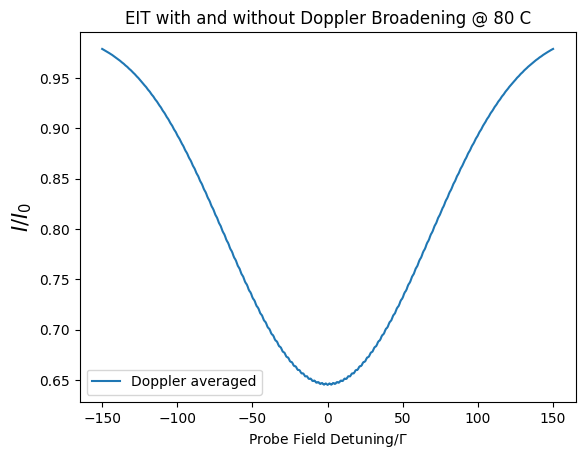

In [ ]:
# two level without control beam (power is zero) #
# EIT with Doppler Broadening #
# Under construction #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np


# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)   # state |a>
state_c = basis(3, 2)    # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85*1e-12    # F/m
hbar = 1.05*1e-34   # J.s
dippole  = 2.5377*1e-29   # C.m
c = 2.99792458e8 # m/s
power_c = 3e-3  *0       # Power for Control beam
power_b = 1e-3         # Power for probe beam
radious = 2e-3         # of the beam
Omega_c = ((dippole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_c)/radious)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dippole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_b)/radious)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data
Gamma_b = .1* 2*np.pi* 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2*np.pi* 1e6  # Decay rate from |a> to |c>, control transition

# Simulation parameters
Delta_b = np.linspace(-150*Gamma_c,150*Gamma_c,503)         # Probe field detuning
Delta_c = 0  # Control field detuning
length = 1e-2   # Length of the cell
gamma = 1 * 2*np.pi* 1e6   # Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80 # C, of the cell
w_b = (377.10746338*1e12 -  4.271676631815181*1e9) * (2*np.pi)  #Angular Freq of probe F=1
w_c = (377.10746338*1e12 +  2.563005979089109*1e9) * (2*np.pi)  #Angular Freq of control F=2
lmda_b = (2*np.pi)*c/w_b # Wavelength of the probe
lmda_c = (2*np.pi)*c/w_c # Wavelength of the control


# Wavevector, Direciton of the beam
k_b = w_b/c  # wave number of probe, beams are co-propagating, for counter propagation multipy by -1
k_c = w_c/c  # wave number of control, beams are co-propagating, for counter propagation multipy by -1

# Number density Calc from the Claussius-Clapyron relation
Tk = temp + 273.15 # K
if Tk < 39.48 + 273.15:
  Pressure = 10**(2.881 + 4.857 - 4215/Tk)
else:
  Pressure = 10**(2.881 + 4.312 - 4040/Tk)
RBolt = 8.314 #j/mol.k
Nav = 6.02214076e23 #1/mol
numberDensity = Pressure*Nav/(RBolt*Tk)


# Define Maxwell Boltzman distribution
def MaxwellBoltzman(velocities, T):
  KBoltz = 1.380649e-23 # JK^-1
  massRb87 = 1.44316089500*1e-25 #kg Rb87
  sigmaMB = np.sqrt(KBoltz * T / massRb87)
  return np.sqrt(1/(2*np.pi*sigmaMB))*np.exp(-0.5*(velocities**2)/(sigmaMB**2))

Velocity_dis = np.linspace(-1200,1200,1003)
MBD = MaxwellBoltzman(Velocity_dis, Tk)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())    # |b><b|
cc = tensor(state_c * state_c.dag())    # |c><c|
ba = tensor(state_b * state_a.dag())   # |b><a|
ca = tensor(state_c * state_a.dag())   # |c><a|
cb = tensor(state_c * state_b.dag())    # |c><b|
bc = tensor(state_b * state_c.dag())    # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb   # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc   # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
c_c = 1
c_b = 0
c_a = 0
rho0 = c_c*cc + c_b*bb + c_a*aa

rho_aa = []
rho_ab = []
rho_ba = []
chi = []


probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
Deltas = [0,0]
ks = [k_b, k_c]

# Considering both Ks are equal
for i, v in enumerate(Velocity_dis):
    for j, p in enumerate(Delta_b):
        Deltas[0] = p
        # For each value of velocity, calculate the effective detuning
        Deltas_eff = np.zeros(len(Deltas))
        for k in range(len(Deltas)):
            Deltas_eff[k] = Deltas[k]+(ks[k]*v)#*2*np.pi#*1e-6 # to convert to MHz
        H = (Omega_b*(ba+ba.dag()) + Omega_c*(ca+ca.dag()) + Deltas_eff[1]*(aa - cc) + Deltas_eff[0]*(aa - bb))
        result = steadystate(H, collapse)
        probe_coherence[i,j] = np.imag(expect(ba.dag(), result))
        #chi.append(expect(ba.dag(), result))

int_manual = np.zeros(len(Delta_b))
pdf = MaxwellBoltzman(Velocity_dis, Tk)
vel_step = Velocity_dis[-1] - Velocity_dis[-2]

# Perform the integration using the rectangle rule.
for i in range(len(Delta_b)):
    p_slice = probe_coherence[:,i]
    weighted = p_slice*pdf*vel_step
    int_manual[i] = np.sum(weighted)



for i in Delta_b:
  H = (Omega_b*(ba+ba.dag()) + Omega_c*(ca+ca.dag()) + Delta_c*(aa - cc) + i*(aa - bb))

  result = steadystate(H, collapse)
  chi.append(expect(ba.dag(), result))


# Extract the results
#probe_coherence = result.expect[0]
alpha = (k_b)*(numberDensity*dippole**2/(hbar*eps*Omega_b))*int_manual #np.imag(probe_coherence)
#dispersion = np.real(probe_coherence)
absorption = np.exp(-alpha*length)


plt.title("EIT with and without Doppler Broadening @ 80 C")
#plt.plot(Delta_b, np.real(chi), label = "Dispersion Index")
#plt.plot(Delta_b/1e6, np.imag(chi), label = "Without Doppler Broadening")
plt.plot(Delta_b/Gamma_c, absorption, label = 'Doppler averaged')
#plt.plot(Delta_b, np.imag(chi), label = "Absorption")
plt.xlabel('Probe Field Detuning/$\Gamma$')
plt.ylabel('$I/I_0$', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
# Transient EIT with Doppler Broadening
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)    # state |a>
state_c = basis(3, 2)    # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85e-12    # F/m
hbar = 1.05e-34   # J.s
dipole  = 2.5377e-29   # C.m
c = 2.99792458e8  # m/s
power_c = 3e-3    # Power for Control beam
power_b = 1e-3    # Power for probe beam
radius = 2e-3     # of the beam

Omega_c = (dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius  # Rabi frequency for |a> <-> |c>, Control
Omega_b = (dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data
Gamma_b = 0.1 * 2 * np.pi * 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |c>, control transition

# Simulation parameters
Delta_b = 0.001* 2 * np.pi * 1e6 #very small detuning #np.linspace(-150 * Gamma_c*0, 150 * Gamma_c*0, 103)  # Probe field detuning
Delta_c = 0.001* 2 * np.pi * 1e6  # Control field detuning
length = 1e-2  # Length of the cell
gamma = 1 * 2 * np.pi * 1e6  # Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80  # C, of the cell
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Angular Freq of control F=2
lmda_b = (2 * np.pi) * c / w_b  # Wavelength of the probe
lmda_c = (2 * np.pi) * c / w_c  # Wavelength of the control

# Wavevector, Direction of the beam
k_b = w_b / c  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c / c  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Number density Calc from the Clausius-Clapeyron relation
Tk = temp + 273.15  # K
if Tk < 39.48 + 273.15:
    Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)
RBolt = 8.314  # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)


# Define Maxwell-Boltzmann distribution
def MaxwellBoltzmann(velocities, T):
    KBoltz = 1.380649e-23  # JK^-1
    massRb87 = 1.44316089500e-25  # kg Rb87
    sigmaMB = np.sqrt(KBoltz * T / massRb87)
    return np.sqrt(1 / (2 * np.pi * sigmaMB)) * np.exp(-0.5 * (velocities ** 2) / (sigmaMB ** 2))


Velocity_dis = np.linspace(-850, 850, 10)
MBD = MaxwellBoltzmann(Velocity_dis, Tk)

# Define the operators
aa = state_a * state_a.dag()  # |a><a|
bb = state_b * state_b.dag()  # |b><b|
cc = state_c * state_c.dag()  # |c><c|
ba = state_b * state_a.dag()  # |b><a|
ca = state_c * state_a.dag()  # |c><a|
cb = state_c * state_b.dag()  # |c><b|
bc = state_b * state_c.dag()  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = cc

probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
Deltas = [0, 0]
ks = [k_b, k_c]

# Time points for the simulation
tlist = np.linspace(0, 10, 300) / (2 * np.pi * 1e6)
t_pump_off = 5.0 / (2 * np.pi * 1e6)  # Time at which the pump field is turned off

# Time-dependent Hamiltonian
def H_t(t, args):
    Deltas_eff = args['Deltas_eff']
    Omega_c_t = Omega_c if t < t_pump_off else 0
    return Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Deltas_eff[1] * (aa - cc) + Deltas_eff[0] * (aa - bb)

# Considering both Ks are equal
for i, v in enumerate(Velocity_dis):
    for j, p in enumerate(Delta_b):
        Deltas[0] = p
        # For each value of velocity, calculate the effective detuning
        Deltas_eff = np.zeros(len(Deltas))
        for k in range(len(Deltas)):
            Deltas_eff[k] = Deltas[k] + (ks[k] * v)
        # Pass the expectation value you want to calculate directly to mesolve
        result = mesolve(H_t, rho0, tlist, collapse, [ba.dag()], args={'Deltas_eff': Deltas_eff})
        # Access the expectation value from the result
        probe_coherence[i, j] = np.imag(result.expect[0][-1])

int_manual = np.zeros(len(Delta_b))
pdf = MaxwellBoltzmann(Velocity_dis, Tk)
vel_step = Velocity_dis[-1] - Velocity_dis[-2]

# Perform the integration using the rectangle rule.
for i in range(len(Delta_b)):
    p_slice = probe_coherence[:, i]
    weighted = p_slice * pdf * vel_step
    int_manual[i] = np.sum(weighted)

chi = []
for i in Delta_b:
    H = Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Delta_c * (aa - cc) + i * (aa - bb)
    result = steadystate(H, collapse)
    chi.append(expect(ba.dag(), result))

# Extract the results
alpha = k_b * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * int_manual  # np.imag(probe_coherence)
absorption = np.exp(-alpha * length)

plt.title("Trans EIT with Doppler Broadening @ 80 C")
plt.plot(Delta_b / Gamma_c, absorption, label='Doppler averaged')
plt.xlabel('Probe Field Detuning/$\Gamma$')
plt.ylabel('$I/I_0$', fontsize=15)
plt.legend()
plt.show()


KeyboardInterrupt: 

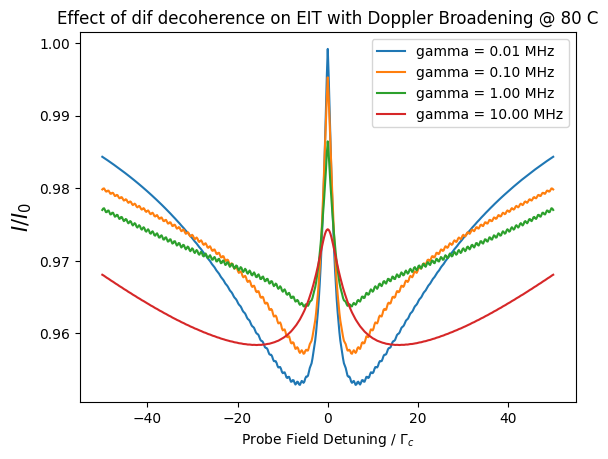

In [ ]:
# Effect of different decoherence #

from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)    # state |a>
state_c = basis(3, 2)    # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85*1e-12    # F/m
hbar = 1.05*1e-34   # J.s
dipole = 2.5377*1e-29   # C.m
c = 2.99792458e8    # m/s
power_c = 3e-3      # Power for Control beam
power_b = 1e-3      # Power for probe beam
radius = 2e-3       # Radius of the beam
Omega_c = ((dipole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_c)/radius)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_b)/radius)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data
Gamma_b = .1* 2*np.pi* 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2*np.pi* 1e6  # Decay rate from |a> to |c>, control transition

# Simulation parameters
Delta_b = np.linspace(-50*Gamma_c,50*Gamma_c,503)  # Probe field detuning
Delta_c = 0  # Control field detuning
length = 1e-2   # Length of the cell
gamma = [.005 * 2*np.pi* 1e6, .1 * 2*np.pi* 1e6, 1 * 2*np.pi* 1e6, 10 * 2*np.pi* 1e6]  # Decoherence rates
temp = 80 # C, of the cell
w_b = (377.10746338*1e12 -  4.271676631815181*1e9) * (2*np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338*1e12 +  2.563005979089109*1e9) * (2*np.pi)  # Angular Freq of control F=2
lmda_b = (2*np.pi)*c/w_b  # Wavelength of the probe
lmda_c = (2*np.pi)*c/w_c  # Wavelength of the control

# Wavevector, Direction of the beam
k_b = w_b/c  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c/c  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Number density Calc from the Clausius-Clapeyron relation
Tk = temp + 273.15 # K
if Tk < 39.48 + 273.15:
  Pressure = 10**(2.881 + 4.857 - 4215/Tk)
else:
  Pressure = 10**(2.881 + 4.312 - 4040/Tk)
RBolt = 8.314 # J/mol.K
Nav = 6.02214076e23 # 1/mol
numberDensity = Pressure*Nav/(RBolt*Tk)

# Define Maxwell-Boltzmann distribution
def MaxwellBoltzmann(velocities, T):
  KBoltz = 1.380649e-23 # JK^-1
  massRb87 = 1.44316089500*1e-25 # kg Rb87
  sigmaMB = np.sqrt(KBoltz * T / massRb87)
  return np.sqrt(1/(2*np.pi*sigmaMB**2)) * np.exp(-0.5*(velocities**2)/(sigmaMB**2))

Velocity_dis = np.linspace(-1200,1200,803)
MBD = MaxwellBoltzmann(Velocity_dis, Tk)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a|
ca = tensor(state_c * state_a.dag())  # |c><a|
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Initial state
rho0 = cc  # Start in state |c>

# Lists to store results
absorption_list = []

# Loop over different decoherence rates
for g in gamma:
  # Collapse operators
  c3 = np.sqrt(g) * cb   # b-c coherence decay (coherence decay rate (c->b))
  c4 = np.sqrt(g) * bc   # c-b coherence decay (coherence decay rate (b->c))
  collapse = [np.sqrt(Gamma_b) * ca, np.sqrt(Gamma_c) * ba, c3, c4]

  probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))

  for i, v in enumerate(Velocity_dis):
    for j, p in enumerate(Delta_b):
      Deltas = [p, Delta_c]
      # Effective detuning for each velocity
      Deltas_eff = [D + k*v for D, k in zip(Deltas, [k_b, k_c])]
      # Hamiltonian
      H = (Omega_b*(ba + ba.dag()) + Omega_c*(ca + ca.dag()) +
           Deltas_eff[1]*(aa - cc) + Deltas_eff[0]*(aa - bb))
      # Steady state
      result = steadystate(H, collapse)
      # Calculate probe coherence
      probe_coherence[i, j] = np.imag(expect(ba.dag(), result))

  # Integration over velocities
  int_manual = np.zeros(len(Delta_b))
  pdf = MaxwellBoltzmann(Velocity_dis, Tk)
  vel_step = Velocity_dis[1] - Velocity_dis[0]
  for i in range(len(Delta_b)):
    p_slice = probe_coherence[:,i]
    weighted = p_slice * pdf * vel_step
    int_manual[i] = np.sum(weighted)

  alpha = k_b * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * int_manual
  absorption = np.exp(-alpha * length)
  absorption_list.append(absorption)

# Plotting
plt.title("Effect of dif decoherence on EIT with Doppler Broadening @ 80 C")
for i, g in enumerate(gamma):
  plt.plot(Delta_b/Gamma_c, absorption_list[i], label=f'gamma = {g/(2*np.pi*1e6):.2f} MHz')
plt.xlabel('Probe Field Detuning / $\Gamma_c$')
plt.ylabel('$I/I_0$', fontsize=15)
plt.legend()
plt.show()


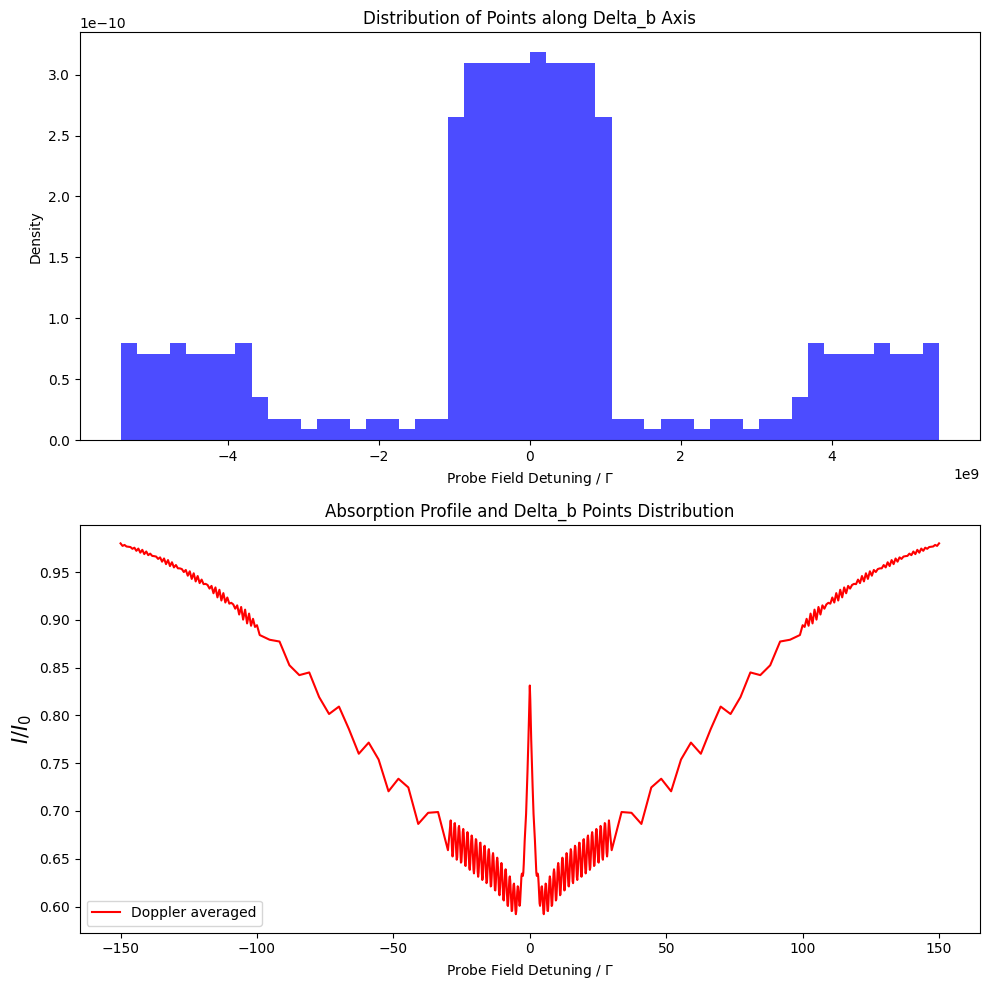

In [ ]:
# Sparse and dense points considerations
# EIT with Doppler Broadening
# Under construction
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)    # state |a>
state_c = basis(3, 2)    # state |c>

# Constants
eps = 8.85 * 1e-12       # F/m
hbar = 1.05 * 1e-34      # J.s
dippole = 2.5377 * 1e-29 # C.m
c = 2.99792458e8         # m/s
power_c = 3e-3           # Power for Control beam
power_b = 1e-3           # Power for probe beam
radius = 2e-3            # Beam radius

# Rabi frequencies
Omega_c = ((dippole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dippole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates
Gamma_b = 0.1 * 2 * np.pi * 1e6   # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |c>, control transition

# Num of points for Delta_b
num_points_dense_edge = 70  # Number of dense points at edges
num_points_sparse = 20  # Number of sparse points in between edges and zero
num_points_dense_zero = 341   # Number of dense points at zero

Delta_b_dense_edge_left = np.linspace(-150 * Gamma_c, -100 * Gamma_c, num_points_dense_edge)
Delta_b_sparse_left = np.linspace(-99 * Gamma_c, -30 * Gamma_c, num_points_sparse)
Delta_b_dense_zero = np.linspace(-29* Gamma_c, 29* Gamma_c, num_points_dense_zero)
Delta_b_sparse_right = np.linspace(30 * Gamma_c, 99 * Gamma_c, num_points_sparse)
Delta_b_dense_edge_right = np.linspace(100 * Gamma_c, 150 * Gamma_c, num_points_dense_edge)

# Combine the sparse and dense points
Delta_b = np.concatenate((Delta_b_dense_edge_left, Delta_b_sparse_left, Delta_b_dense_zero, Delta_b_sparse_right, Delta_b_dense_edge_right))

# Delta_b length
Delta_b = Delta_b[:521]

# Additional simulation parameters
Delta_c = 0                  # Control field detuning
length = 1e-2                # Length of the cell
gamma = 1 * 2 * np.pi * 1e6  # Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80                    # Temperature of the cell in Celsius
Tk = temp + 273.15           # Temperature in Kelvin

# Calculation of number density
if Tk < 39.48 + 273.15:
    Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)

RBolt = 8.314      # Gas constant in J/mol·K
Nav = 6.02214076e23 # Avogadro's number
numberDensity = Pressure * Nav / (RBolt * Tk)

# Maxwell-Boltzmann distribution
def MaxwellBoltzman(velocities, T):
    KBoltz = 1.380649e-23  # Boltzmann constant in J/K
    massRb87 = 1.44316089500 * 1e-25  # Mass of Rb87 in kg
    sigmaMB = np.sqrt(KBoltz * T / massRb87)
    return np.sqrt(1 / (2 * np.pi * sigmaMB)) * np.exp(-0.5 * (velocities ** 2) / (sigmaMB ** 2))



# Num of points for Velocity
num_points_sparse_v = 53  # Number of sparse points in between edges and zero
num_points_dense_v = 450   # Number of dense points at edges and zero


v_b_sparse1 = np.linspace(-1250, -81, num_points_sparse_v)
v_b_dense = np.linspace(-80, 80, num_points_dense_v)
v_b_sparse2 = np.linspace(81, 1250, num_points_sparse_v)

# Combine the sparse and dense points
v_b = np.concatenate((v_b_sparse1, v_b_dense, v_b_sparse2))

# Delta_b length
Velocity_dis = v_b[:656]

#Velocity_dis = np.linspace(-1200, 1200, 503)
MBD = MaxwellBoltzman(Velocity_dis, Tk)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a|
ca = tensor(state_c * state_a.dag())  # |c><a|
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb    # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc    # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
c_c = 1
c_b = 0
c_a = 0
rho0 = c_c * cc + c_b * bb + c_a * aa

# Arrays for storing results
probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
int_manual = np.zeros(len(Delta_b))
chi = []

# Loop over velocities and probe detunings
ks = [k_b, k_c]
Deltas = [0, 0]

for i, v in enumerate(Velocity_dis):
    for j, p in enumerate(Delta_b):
        Deltas[0] = p
        # Effective detunings
        Deltas_eff = np.zeros(len(Deltas))
        for k in range(len(Deltas)):
            Deltas_eff[k] = Deltas[k] + (ks[k] * v)
        H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Deltas_eff[1] * (aa - cc) + Deltas_eff[0] * (aa - bb))
        result = steadystate(H, collapse)
        probe_coherence[i, j] = np.imag(expect(ba.dag(), result))

# Integration using rectangle rule
for i in range(len(Delta_b)):
    p_slice = probe_coherence[:, i]
    weighted = p_slice * MBD * (Velocity_dis[-1] - Velocity_dis[-2])
    int_manual[i] = np.sum(weighted)

# Calculation of absorption
alpha = (k_b) * (numberDensity * dippole**2 / (hbar * eps * Omega_b)) * int_manual
absorption = np.exp(-alpha * length)

# Plotting
plt.figure(figsize=(10, 10))

# Plot the Delta_b distribution
plt.subplot(2, 1, 1)
plt.title("Distribution of Points along Delta_b Axis")
plt.hist(Delta_b, bins=50, density=True, alpha=0.7, color='blue')
plt.xlabel('Probe Field Detuning / $\Gamma$')
plt.ylabel('Density')

# Plot the absorption profile
plt.subplot(2, 1, 2)
plt.title("Absorption Profile and Delta_b Points Distribution")
plt.plot(Delta_b / Gamma_c, absorption, label='Doppler averaged', color='red')
plt.xlabel('Probe Field Detuning / $\Gamma$')
plt.ylabel('$I/I_0$', fontsize=15)
plt.legend()

plt.tight_layout()
plt.show()


# Running with GPU from here  😎

In [ ]:
!nvidia-smi

Thu Jul  4 14:34:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install qutip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 4.7 MB/s eta 0:00:00


In [ ]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from numba import cuda, float64
import math

# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)    # state |a>
state_c = basis(3, 2)    # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85*1e-12    # F/m
hbar = 1.05*1e-34   # J.s
dipole = 2.5377*1e-29   # C.m
c = 2.99792458e8    # m/s
power_c = 3e-3      # Power for Control beam
power_b = 1e-3      # Power for probe beam
radius = 2e-3       # Radius of the beam

# Calculate Rabi frequencies
Omega_c = ((dipole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_c)/radius)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole/np.sqrt(eps*c*hbar**2*np.pi))*np.sqrt(power_b)/radius)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from Steck data
Gamma_b = .1 * 2 * np.pi * 1e6      # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6    # Decay rate from |a> to |c>, control transition

# Simulation parameters
Delta_b = np.linspace(-150*Gamma_c, 150*Gamma_c, 303)  # Probe field detuning
Delta_c = 0                                             # Control field detuning
length = 1e-2                                           # Length of the cell
gamma = 1 * 2 * np.pi * 1e6                             # Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80                                               # Temperature of the cell in °C
Tk = temp + 273.15                                      # Temperature in K

# Angular frequencies of probe and control fields
w_b = (377.10746338*1e12 - 4.271676631815181*1e9) * (2*np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338*1e12 + 2.563005979089109*1e9) * (2*np.pi)  # Angular Freq of control F=2

# Wavelengths
lmda_b = (2*np.pi)*c/w_b  # Wavelength of the probe
lmda_c = (2*np.pi)*c/w_c  # Wavelength of the control

# Wavevectors, Direction of the beam
k_b = w_b / c  # Wave number of probe, beams are co-propagating
k_c = w_c / c  # Wave number of control, beams are co-propagating

# Number density calculation from the Clausius-Clapeyron relation
if Tk < 39.48 + 273.15:
    Pressure = 10**(2.881 + 4.857 - 4215/Tk)
else:
    Pressure = 10**(2.881 + 4.312 - 4040/Tk)
RBolt = 8.314  # J/mol·K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)

# Define Maxwell-Boltzmann distribution
def MaxwellBoltzmann(velocities, T):
    KBoltz = 1.380649e-23  # J/K
    massRb87 = 1.44316089500*1e-25  # kg (mass of Rb87)
    sigmaMB = np.sqrt(KBoltz * T / massRb87)
    return np.sqrt(1 / (2 * np.pi * sigmaMB**2)) * np.exp(-0.5 * (velocities**2) / (sigmaMB**2))

Velocity_dis = np.linspace(-1200, 1200, 303)
MBD = MaxwellBoltzmann(Velocity_dis, Tk)

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a>
ca = tensor(state_c * state_a.dag())  # |c><a>
cb = tensor(state_c * state_b.dag())  # |c><b>
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb    # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc    # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
c_c = 1
c_b = 0
c_a = 0
rho0 = c_c * cc + c_b * bb + c_a * aa

rho_aa = []
rho_ab = []
rho_ba = []
chi = []

# Constants for GPU computation
d_Omega_b = cuda.to_device(np.array(Omega_b))
d_Omega_c = cuda.to_device(np.array(Omega_c))
d_ks = cuda.to_device(np.array([k_b, k_c]))
d_collapse = cuda.to_device(collapse)
d_rho0 = cuda.to_device(rho0)

# Define CUDA kernel
@cuda.jit
def compute_probe_coherence(Velocity_dis, Delta_b, probe_coherence, collapse, Omega_b, Omega_c, ks):
    i = cuda.grid(1)
    if i < Velocity_dis.shape[0]:
        for j in range(Delta_b.shape[0]):
            Deltas = [Delta_b[j], 0]  # Adjust this as needed
            Deltas_eff = np.zeros(len(Deltas))
            for k in range(len(Deltas)):
                Deltas_eff[k] = Deltas[k] + (ks[k] * Velocity_dis[i])
            H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Deltas_eff[1] * (aa - cc) + Deltas_eff[0] * (aa - bb))
            result = steadystate(H, collapse)
            probe_coherence[i, j] = np.imag(expect(ba.dag(), result))

# Allocate memory on the device for the probe coherence
d_probe_coherence = cuda.device_array((len(Velocity_dis), len(Delta_b)), dtype=np.float64)

# Launch the kernel
threadsperblock = 32
blockspergrid = math.ceil(len(Velocity_dis) / threadsperblock)
compute_probe_coherence[blockspergrid, threadsperblock](Velocity_dis, Delta_b, d_probe_coherence, d_collapse, d_Omega_b, d_Omega_c, d_ks)

# Copy the result back to the host
probe_coherence = d_probe_coherence.copy_to_host()

int_manual = np.zeros(len(Delta_b))
pdf = MaxwellBoltzmann(Velocity_dis, Tk)
vel_step = Velocity_dis[-1] - Velocity_dis[-2]

# Perform the integration using the rectangle rule.
for i in range(len(Delta_b)):
    p_slice = probe_coherence[:, i]
    weighted = p_slice * pdf * vel_step
    int_manual[i] = np.sum(weighted)

for i in Delta_b:
    H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Delta_c * (aa - cc) + i * (aa - bb))
    result = steadystate(H, collapse)
    chi.append(expect(ba.dag(), result))

# Extract the results
alpha = k_b * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * int_manual
absorption = np.exp(-alpha * length)

plt.title("EIT with and without Doppler Broadening @ 80 C")
plt.plot(Delta_b / Gamma_c, absorption, label='Doppler averaged')
plt.xlabel('Probe Field Detuning/$\Gamma$')
plt.ylabel('$I/I_0$', fontsize=15)
plt.show()


TypingError: Failed in cuda mode pipeline (step: nopython frontend)
Untyped global name 'ba': Cannot determine Numba type of <class 'qutip.core.qobj.Qobj'>

File "<ipython-input-9-5deabdefa74a>", line 112:
def compute_probe_coherence(Velocity_dis, Delta_b, probe_coherence, collapse, Omega_b, Omega_c, ks):
    <source elided>
                Deltas_eff[k] = Deltas[k] + (ks[k] * Velocity_dis[i])
            H = (Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Deltas_eff[1] * (aa - cc) + Deltas_eff[0] * (aa - bb))
            ^


In [ ]:
# Transient EIT with Doppler Broadening
# 2

from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)    # state |b>
state_a = basis(3, 1)    # state |a>
state_c = basis(3, 2)    # state |c>

# Rabi frequencies for pump and control beam
eps = 8.85e-12    # F/m
hbar = 1.05e-34   # J.s
dipole  = 2.5377e-29   # C.m
c = 2.99792458e8  # m/s
power_c = 3e-3    # Power for Control beam
power_b = 1e-3    # Power for probe beam
radius = 2e-3     # of the beam

Omega_c = (dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius  # Rabi frequency for |a> <-> |c>, Control
Omega_b = (dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data
Gamma_b = 0.1 * 2 * np.pi * 1e6  # Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # Decay rate from |a> to |c>, control transition

# Simulation parameters
Delta_b = np.zeros(503, dtype = float) # Probe field detuning
Delta_c = 0.0 # Control field detuning
length = 1e-2  # Length of the cell
gamma = 1 * 2 * np.pi * 1e6  # Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80  # C, of the cell
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Angular Freq of control F=2
lmda_b = (2 * np.pi) * c / w_b  # Wavelength of the probe
lmda_c = (2 * np.pi) * c / w_c  # Wavelength of the control

# Wavevector, Direction of the beam
k_b = w_b / c  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c / c  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Number density Calc from the Clausius-Clapeyron relation
Tk = temp + 273.15  # K
if Tk < 39.48 + 273.15:
    Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)
RBolt = 8.314  # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)


# Define Maxwell-Boltzmann distribution
def MaxwellBoltzmann(velocities, T):
    KBoltz = 1.380649e-23  # JK^-1
    massRb87 = 1.44316089500e-25  # kg Rb87
    sigmaMB = np.sqrt(KBoltz * T / massRb87)
    return np.sqrt(1 / (2 * np.pi * sigmaMB)) * np.exp(-0.5 * (velocities ** 2) / (sigmaMB ** 2))


Velocity_dis = np.linspace(-850, 850, 300)
MBD = MaxwellBoltzmann(Velocity_dis, Tk)

# Define the operators
aa = state_a * state_a.dag()  # |a><a|
bb = state_b * state_b.dag()  # |b><b|
cc = state_c * state_c.dag()  # |c><c|
ba = state_b * state_a.dag()  # |b><a|
ca = state_c * state_a.dag()  # |c><a|
cb = state_c * state_b.dag()  # |c><b|
bc = state_b * state_c.dag()  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = cc

probe_coherence = np.zeros((len(Velocity_dis), len(Delta_b)))
Deltas = [0, 0]
ks = [k_b, k_c]

# Time points for the simulation
tlist = np.linspace(0, 10, 300) / (2 * np.pi * 1e6)
t_pump_off = 5.0 / (2 * np.pi * 1e6)  # Time at which the pump field is turned off

# Time-dependent Hamiltonian
def H_t(t, args):
    Deltas_eff = args['Deltas_eff']
    Omega_c_t = Omega_c if t < t_pump_off else 0
    return Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Deltas_eff[1] * (aa - cc) + Deltas_eff[0] * (aa - bb)

# Considering both Ks are equal
for i, v in enumerate(Velocity_dis):
    for j, p in enumerate(Delta_b):
        Deltas[0] = p
        # For each value of velocity, calculate the effective detuning
        Deltas_eff = np.zeros(len(Deltas))
        for k in range(len(Deltas)):
            Deltas_eff[k] = Deltas[k] + (ks[k] * v)
        # Pass the expectation value you want to calculate directly to mesolve
        result = mesolve(H_t, rho0, tlist, collapse, [ba.dag()], args={'Deltas_eff': Deltas_eff})
        # Access the expectation value from the result
        probe_coherence[i, j] = np.imag(result.expect[0][-1])

int_manual = np.zeros(len(Delta_b))
pdf = MaxwellBoltzmann(Velocity_dis, Tk)
vel_step = Velocity_dis[-1] - Velocity_dis[-2]

# Perform the integration using the rectangle rule.
for i in range(len(Delta_b)):
    p_slice = probe_coherence[:, i]
    weighted = p_slice * pdf * vel_step
    int_manual[i] = np.sum(weighted)

chi = []
for i in Delta_b:
    H = Omega_b * (ba + ba.dag()) + Omega_c * (ca + ca.dag()) + Delta_c * (aa - cc) + i * (aa - bb)
    result = steadystate(H, collapse)
    chi.append(expect(ba.dag(), result))

# Extract the results
alpha = k_b * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * int_manual  # np.imag(probe_coherence)
absorption = np.exp(-alpha * length)

plt.title("Trans EIT with Doppler Broadening @ 80 C")
plt.plot(Delta_b / Gamma_c, absorption, label='Doppler averaged')
plt.xlabel('Probe Field Detuning/$\Gamma$')
plt.ylabel('$I/I_0$', fontsize=15)
plt.legend()
plt.show()


KeyboardInterrupt: 

In [ ]:
# Trans EIT #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Simulation parameters
length = 1e-2  # Length of the cell
gamma = 5 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80  # C, temperature of the cell
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Angular Freq of control F=2
lmda_b = (2 * np.pi) * 3e8 / w_b  # Wavelength of the probe
lmda_c = (2 * np.pi) * 3e8 / w_c  # Wavelength of the control

# Wavevector, Direction of the beam
k_b = w_b / 3e8  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c / 3e8  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Number density Calc from the Clausius-Clapeyron relation
Tk = temp + 273.15  # K
if Tk < 39.48 + 273.15:
    Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)
RBolt = 8.314  # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)

# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius)  # Rabi frequency for |a> <-> |b>, probe

# Define Maxwell-Boltzmann distribution
def MaxwellBoltzmann(velocities, T):
    KBoltz = 1.380649e-23  # JK^-1
    massRb87 = 1.44316089500e-25  # kg Rb87
    sigmaMB = np.sqrt(KBoltz * T / massRb87)
    return np.sqrt(1 / (2 * np.pi * sigmaMB**2)) * np.exp(-0.5 * (velocities ** 2) / (sigmaMB ** 2))

Velocity_dis = np.linspace(-850, 850, 300)
MBD = MaxwellBoltzmann(Velocity_dis, Tk)

# Decay rates from steck data
Gamma_b = .1 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |c>, control transition

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a|
ca = tensor(state_c * state_a.dag())  # |c><a|
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = (cc + bb)/np.sqrt(2)

# Time points for the simulation
tlist = np.linspace(0, 10, 500) / (1e6)
t_pump_off = 5.0 / (1e6)  # Time at which the pump field is turned off

# Sigmoid function for smooth transition
def sigmoid(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Store results
absorption_list = []

for v in Velocity_dis:
    Delta_b = k_b * v
    Delta_c = k_c * v

    # Time-dependent Hamiltonian
    def H_t(t, args):
        Omega_c_t = Omega_c * sigmoid(t, t_pump_off, -.7776*Gamma_c)  # Sigmoid transition
        return (Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Delta_c * (aa - cc) + Delta_b * (aa - bb))

    # Solve the master equation
    result = mesolve(H_t, rho0, tlist, collapse, [ba.dag()])

    # Extract the results
    probe_coherence = result.expect[0]
    absorption_list.append(np.imag(probe_coherence))

int_manual = []
pdf = MaxwellBoltzmann(Velocity_dis, Tk)
vel_step = Velocity_dis[1] - Velocity_dis[0]

# Perform the integration using the rectangle rule
for i in range(len(tlist)):
    p_slice = [absorption_list[j][i] for j in range(len(Velocity_dis))]
    weighted = np.array(p_slice) * pdf * vel_step
    int_manual.append(np.sum(weighted))

# Extract the results
alpha = k_b * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * np.array(int_manual)
absorption = np.exp(-alpha * length)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(tlist * (1e6), absorption, label="Total absorption over velocities")
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
#plt.yscale('log')
plt.legend()
plt.title('Trans EIT with Doppler and Sigmoid Transition')
plt.show()

KeyboardInterrupt: 

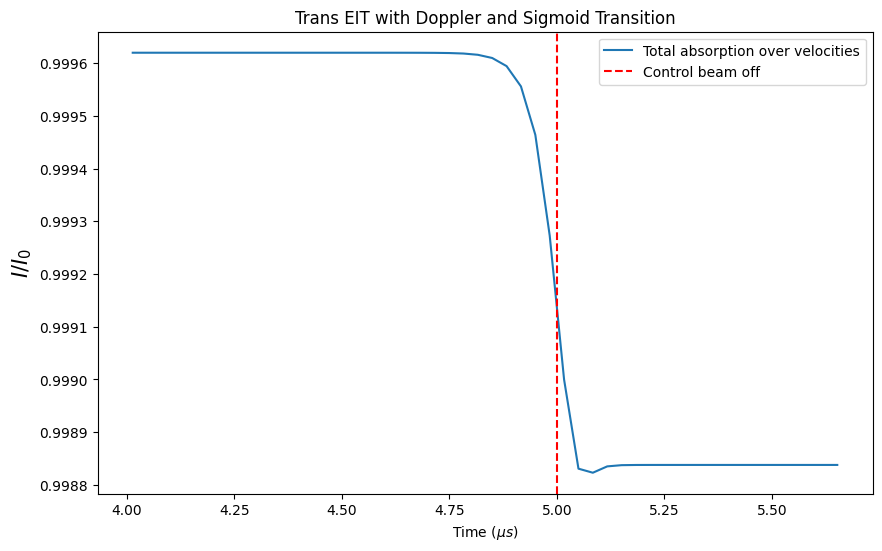

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(tlist[120:170] * (1e6), absorption[120:170], label="Total absorption over velocities")
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
#plt.yscale('log')
plt.legend()
plt.title('Trans EIT with Doppler and Sigmoid Transition')
plt.show()

In [ ]:
# Sigmoid function for smooth transition
def sigmoid(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))

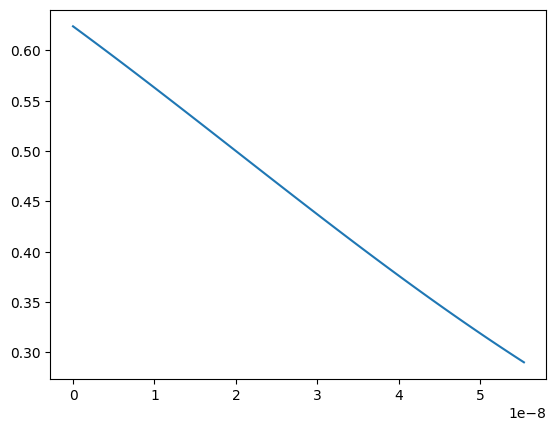

In [ ]:
x = np.linspace(0,2,100)/Gamma_c
y = sigmoid(x, 2e-8, -.7*Gamma_c)
plt.plot(x, y)
plt.show()

In [ ]:
28096646.118741635/Gamma_c

0.7776904546263387

<ipython-input-12-d978facef4fc>:75: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-k * (x - x0)))


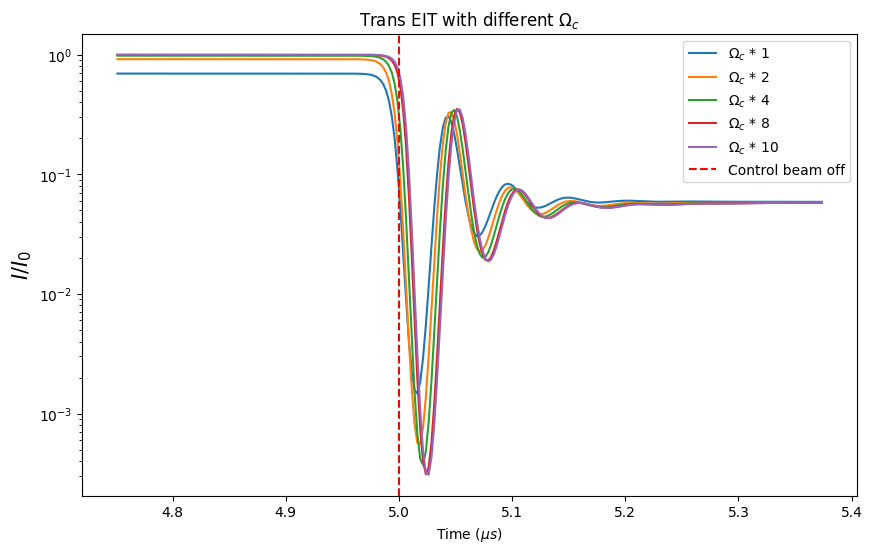

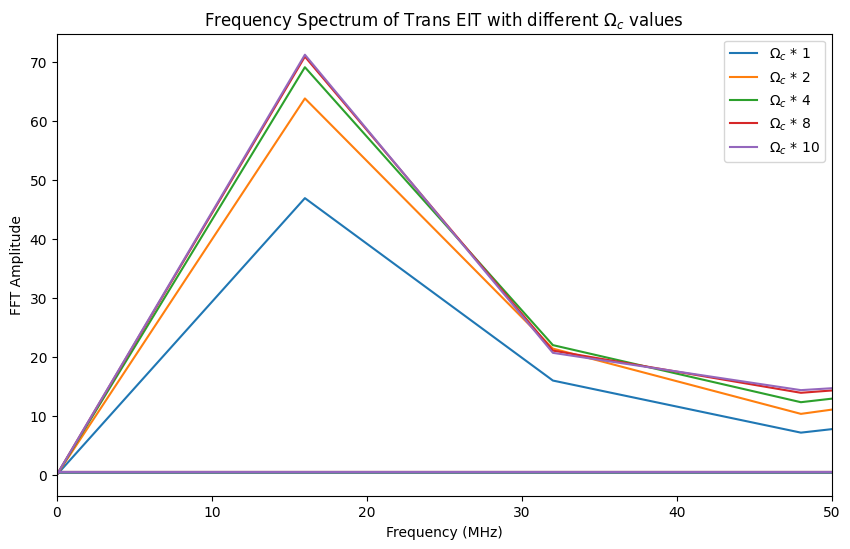

In [ ]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
from scipy.fft import fftfreq

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Simulation parameters
length = 1e-2  # Length of the cell
gamma = 1 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80  # C, temperature of the cell
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Angular Freq of control F=2
lmda_b = (2 * np.pi) * 3e8 / w_b  # Wavelength of the probe
lmda_c = (2 * np.pi) * 3e8 / w_c  # Wavelength of the control

# Wavevector, Direction of the beam
k_b = w_b / 3e8  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c / 3e8  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Number density Calc from the Clausius-Clapeyron relation
Tk = temp + 273.15  # K
if Tk < 39.48 + 273.15:
    Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)
RBolt = 8.314  # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)

# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c_base = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data
Gamma_b = .1 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |c>, control transition

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a>
ca = tensor(state_c * state_a.dag())  # |c><a>
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = (cc + bb) / np.sqrt(2)

# Time points for the simulation
tlist = np.linspace(0, 10, 4000) / (1e6)
t_pump_off = 5.0 / (1e6)  # Time at which the pump field is turned off

# Sigmoid function for smooth transition
def sigmoid(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Scaling factors for Omega_c
scaling_factors = [1, 2, 4, 8, 10]

# Store results
results_dict = {}
fft_dict = {}

for factor in scaling_factors:
    Omega_c = Omega_c_base * factor

    # Time-dependent Hamiltonian
    def H_t(t, args):
        Omega_c_t = Omega_c * sigmoid(t, t_pump_off, -5.5*Gamma_c)  # Sigmoid transition
        Delta_c = 0  # One photon detuning
        Delta_b = 0  # One photon detuning
        return (Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Delta_c * (aa - cc) + Delta_b * (aa - bb))

    # Solve the master equation
    result = mesolve(H_t, rho0, tlist, collapse, [ba.dag()])

    # Extract the results
    probe_coherence = result.expect[0]
    absorption_list = np.imag(probe_coherence)

    # Calculate alpha and absorption
    alpha = k_b * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * np.array(absorption_list)
    absorption = np.exp(-alpha * length)

    # Store the results
    results_dict[factor] = absorption

    # Perform FFT
    #fft_result = fft(absorption)
    #fft_freq = fftfreq(tlist[1900:2150], d=(tlist[1] - tlist[0])) / (2 * np.pi * 1e6)  # Convert to MHz
    #fft_dict[factor] = (fft_freq, np.abs(fft_result))

    # Perform FFT on the specified interval
    absorption_subset = absorption[1900:2150]
    absorption_AC = absorption_subset - np.mean(absorption_subset)  # Remove DC offset
    tlist_subset = tlist[1900:2150]
    fft_result = fft(absorption_AC)
    N = len(absorption)
    n = np.arange(N)
    sr = 1/(4000)  # Sample rate
    T = N/sr
    #fft_freq = n/T
    fft_freq = fftfreq(fft_result.size, d = 1/4000 )
    fft_dict[factor] = (fft_freq, np.abs(fft_result))

# Plot the results
plt.figure(figsize=(10, 6))
for factor in scaling_factors:
    absorption = results_dict[factor]
    plt.plot(tlist[1900:2150] * (1e6), absorption[1900:2150], label=f'$\Omega_c$ * {factor}')
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
plt.yscale('log')
plt.legend()
plt.title('Trans EIT with different $\Omega_c$')
plt.show()

# Plot the FFT results
plt.figure(figsize=(10, 6))
for factor in scaling_factors:
    fft_freq, fft_result = fft_dict[factor]
    plt.plot(fft_freq, fft_result, label=f'$\Omega_c$ * {factor}')
plt.xlim(0, 50)  # Limit x-axis for better visibility
plt.xlabel('Frequency (MHz)')
plt.ylabel('FFT Amplitude')
plt.legend()
#plt.yscale('log')
plt.title('Frequency Spectrum of Trans EIT with different $\Omega_c$ values')
plt.show()


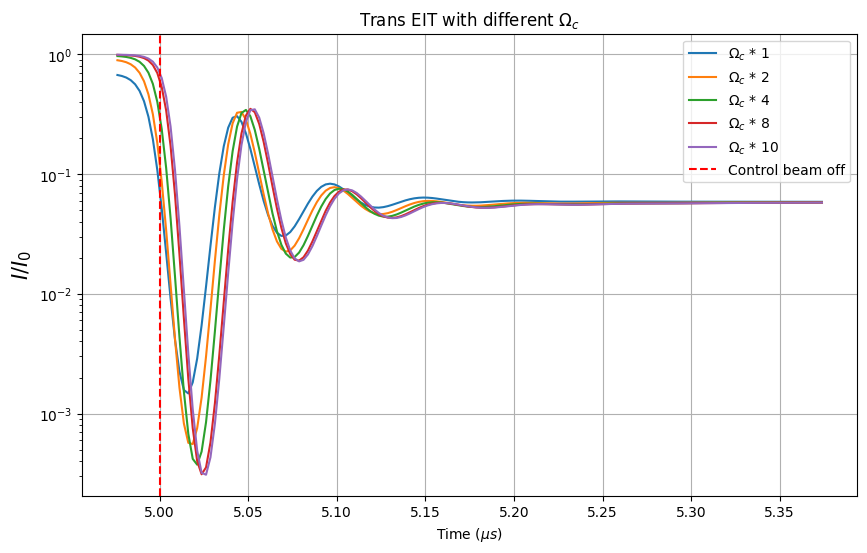

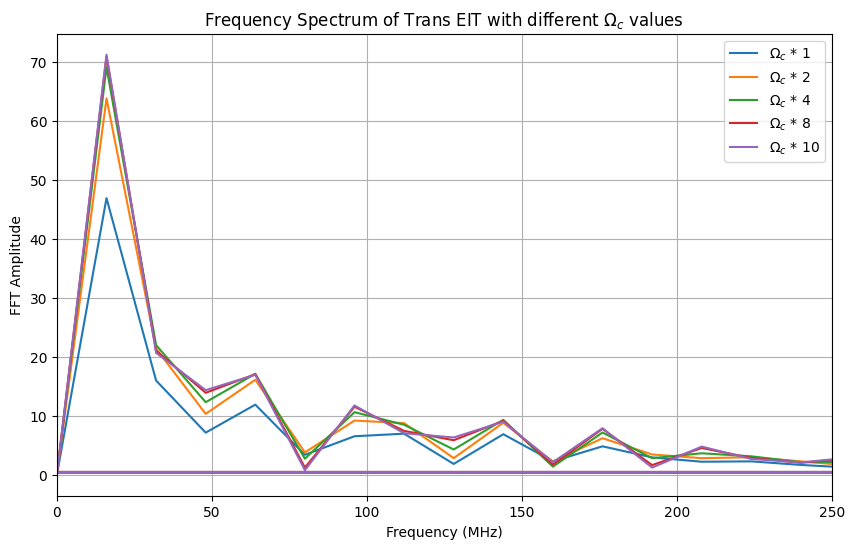

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
for factor in scaling_factors:
    absorption = results_dict[factor]
    plt.plot(tlist[1990:2150] * (1e6), absorption[1990:2150], label=f'$\Omega_c$ * {factor}')
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
plt.yscale('log')
plt.grid()
plt.legend()
plt.title('Trans EIT with different $\Omega_c$')
plt.show()

# Plot the FFT results
plt.figure(figsize=(10, 6))
for factor in scaling_factors:
    fft_freq, fft_result = fft_dict[factor]
    plt.plot(fft_freq, fft_result[:], label=f'$\Omega_c$ * {factor}')
plt.xlim(0, 250)  # Limit x-axis for better visibility
plt.xlabel('Frequency (MHz)')
plt.ylabel('FFT Amplitude')
plt.grid()
plt.legend()
plt.title('Frequency Spectrum of Trans EIT with different $\Omega_c$ values')
plt.show()

In [ ]:
5.1-5.05

0.04999999999999982

In [ ]:
1/.05

20.0

<ipython-input-24-03041e37fd04>:74: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-k * (x - x0)))


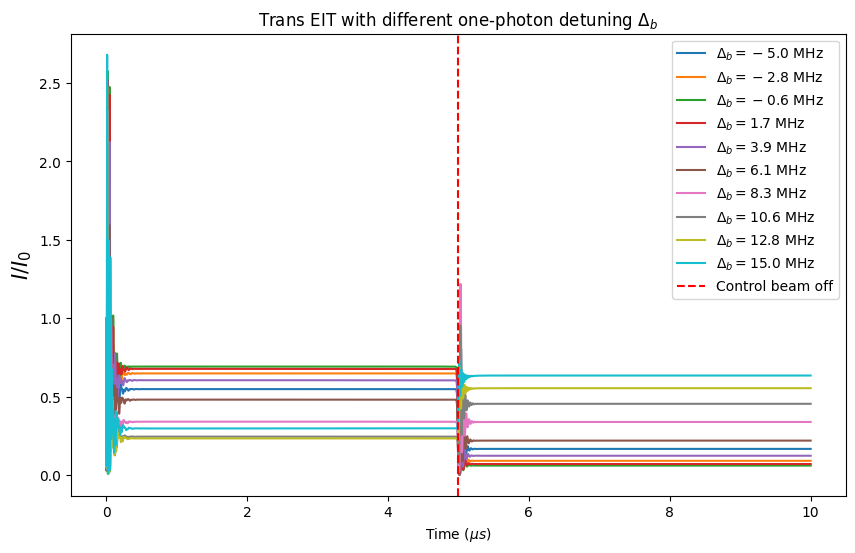

In [ ]:
# One photon-detuning effect on Trans EIT #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Simulation parameters
length = 1e-2  # Length of the cell
gamma = 1 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80  # C, temperature of the cell
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Angular Freq of control F=2
lmda_b = (2 * np.pi) * 3e8 / w_b  # Wavelength of the probe
lmda_c = (2 * np.pi) * 3e8 / w_c  # Wavelength of the control

# Wavevector, Direction of the beam
k_b = w_b / 3e8  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c / 3e8  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Number density Calc from the Clausius-Clapeyron relation
Tk = temp + 273.15  # K
if Tk < 39.48 + 273.15:
    Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)
RBolt = 8.314  # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)

# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data
Gamma_b = .1 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |c>, control transition

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a|
ca = tensor(state_c * state_a.dag())  # |c><a|
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = (cc + bb) / np.sqrt(2)

# Time points for the simulation
tlist = np.linspace(0, 10, 4000) / (1e6)
t_pump_off = 5.0 / (1e6)  # Time at which the pump field is turned off

# Sigmoid function for smooth transition
def sigmoid(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Range of one-photon detuning values (Delta_b)
detuning_values = np.linspace(-5e6, 15e6, 10) * (2 * np.pi)

# Store results
results_dict = {}

for Delta_b in detuning_values:

    # Time-dependent Hamiltonian
    def H_t(t, args):
        Omega_c_t = Omega_c * sigmoid(t, t_pump_off, -5.5*Gamma_c)  # Sigmoid transition
        Delta_c = 0  # One photon detuning
        return (Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Delta_c * (aa - cc) + Delta_b * (aa - bb))

    # Solve the master equation
    result = mesolve(H_t, rho0, tlist, collapse, [ba.dag()])

    # Extract the results
    probe_coherence = result.expect[0]
    absorption_list = np.imag(probe_coherence)

    # Calculate alpha and absorption
    alpha = k_b * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * np.array(absorption_list)
    absorption = np.exp(-alpha * length)

    # Store the results
    results_dict[Delta_b] = absorption


   # Perform FFT on the specified interval
    absorption_subset = absorption[1900:2150]
    absorption_AC = absorption_subset - np.mean(absorption_subset)  # Remove DC offset
    tlist_subset = tlist[1900:2150]
    fft_result = fft(absorption_AC)
    N = len(absorption)
    n = np.arange(N)
    sr = 1/(4000)  # Sample rate
    T = N/sr
    #fft_freq = n/T
    fft_freq = fftfreq(fft_result.size, d = 1/4000 )
    fft_dict[Delta_b] = (fft_freq, np.abs(fft_result))

# Plot the results
plt.figure(figsize=(10, 6))
for Delta_b in detuning_values:
    absorption = results_dict[Delta_b]
    plt.plot(tlist * (1e6), absorption, label=f'$\Delta_b = {Delta_b/(2*np.pi*1e6):.1f}$ MHz')
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
plt.legend()
plt.title('Trans EIT with different one-photon detuning $\Delta_b$')
plt.show()


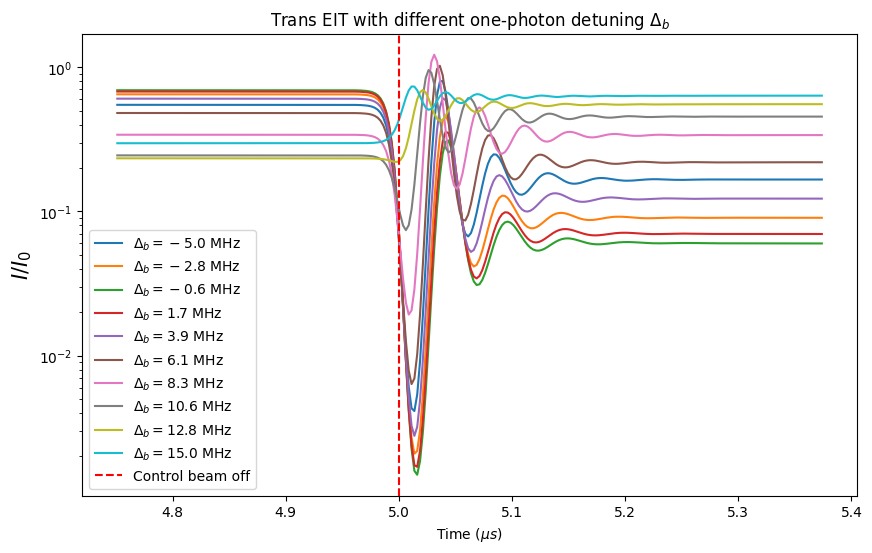

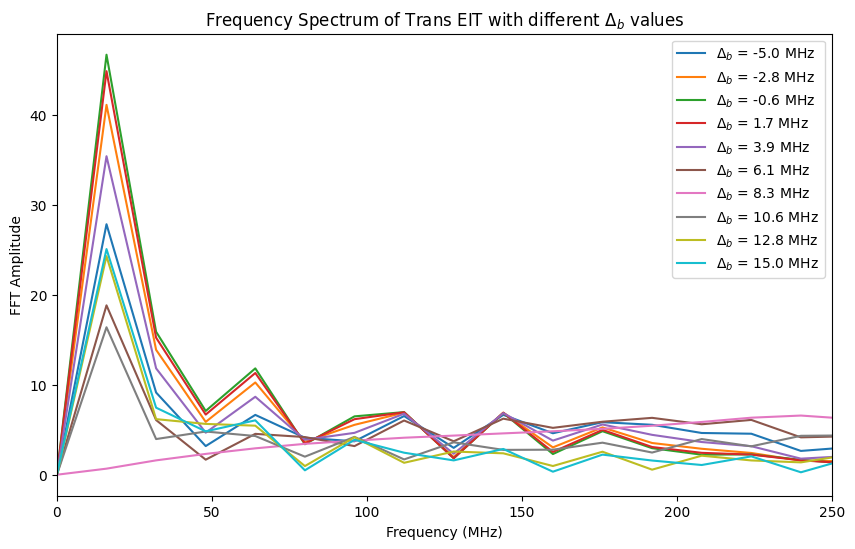

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
for Delta_b in detuning_values:
    absorption = results_dict[Delta_b]
    plt.plot(tlist[1900:2150] * (1e6), absorption[1900:2150], label=f'$\Delta_b = {Delta_b/(2*np.pi*1e6):.1f}$ MHz')
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
plt.yscale(
    'log'
)
plt.legend()
plt.title('Trans EIT with different one-photon detuning $\Delta_b$')
plt.show()

# Plot the FFT results
plt.figure(figsize=(10, 6))
for Delta_b in detuning_values:
    fft_freq, fft_result = fft_dict[Delta_b]
    plt.plot(fft_freq[:100], fft_result[:100], label=f'$\Delta_b$ = {Delta_b/(2*np.pi*1e6):.1f} MHz')
plt.xlim(0, 250)  # Limit x-axis for better visibility
plt.xlabel('Frequency (MHz)')
plt.ylabel('FFT Amplitude')
plt.legend()
plt.title('Frequency Spectrum of Trans EIT with different $\Delta_b$ values')
plt.show()

<ipython-input-8-143b8901a1b3>:74: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-k * (x - x0)))


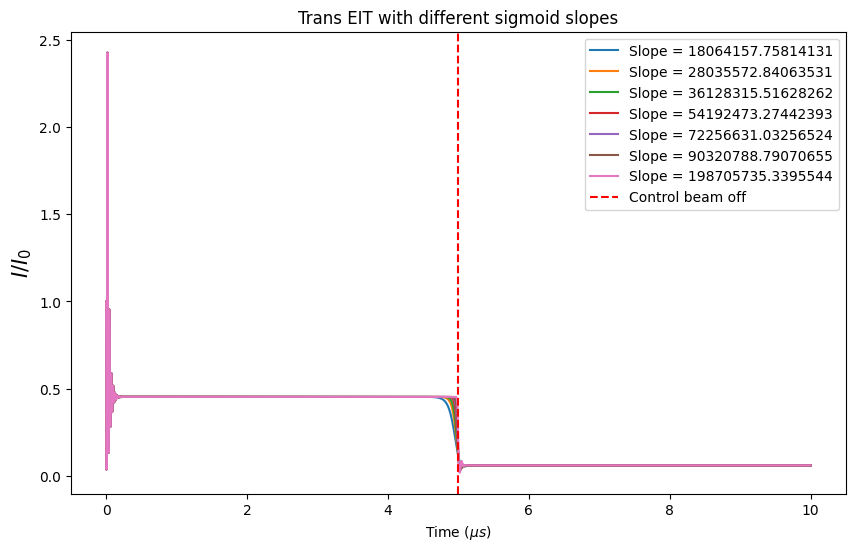

In [ ]:
# Sigmoid Slope #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Simulation parameters
length = 1e-2  # Length of the cell
gamma = 5 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80  # C, temperature of the cell
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Angular Freq of control F=2
lmda_b = (2 * np.pi) * 3e8 / w_b  # Wavelength of the probe
lmda_c = (2 * np.pi) * 3e8 / w_c  # Wavelength of the control

# Wavevector, Direction of the beam
k_b = w_b / 3e8  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c / 3e8  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Number density Calc from the Clausius-Clapeyron relation
Tk = temp + 273.15  # K
if Tk < 39.48 + 273.15:
    Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)
RBolt = 8.314  # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)

# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data
Gamma_b = .1 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |c>, control transition

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a>
ca = tensor(state_c * state_a.dag())  # |c><a>
cb = tensor(state_c * state_b.dag())  # |c><b>
bc = tensor(state_b * state_c.dag())  # |b><c>

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = (cc + bb) / np.sqrt(2)

# Time points for the simulation
tlist = np.linspace(0, 10, 2000) / (1e6)
t_pump_off = 5.0 / (1e6)  # Time at which the pump field is turned off

# Sigmoid function for smooth transition
def sigmoid(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Range of sigmoid slope values
sigmoid_slopes = [0.5* Gamma_c, .776* Gamma_c, 1.0* Gamma_c, 1.5* Gamma_c, 2.0* Gamma_c, 2.5* Gamma_c, 5.5* Gamma_c]

# Store results
results_dict = {}

for slope in sigmoid_slopes:

    # Time-dependent Hamiltonian
    def H_t(t, args):
        Omega_c_t = Omega_c * sigmoid(t, t_pump_off, -slope)  # Sigmoid transition with variable slope
        Delta_c = 0  # One photon detuning
        Delta_b = 0  # One photon detuning
        return (Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Delta_c * (aa - cc) + Delta_b * (aa - bb))

    # Solve the master equation
    result = mesolve(H_t, rho0, tlist, collapse, [ba.dag()])

    # Extract the results
    probe_coherence = result.expect[0]
    absorption_list = np.imag(probe_coherence)

    # Calculate alpha and absorption
    alpha = k_b * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * np.array(absorption_list)
    absorption = np.exp(-alpha * length)

    # Store the results
    results_dict[slope] = absorption

# Plot the results
plt.figure(figsize=(10, 6))
for slope in sigmoid_slopes:
    absorption = results_dict[slope]
    plt.plot(tlist* (1e6), absorption, label=f'Slope = {slope}')
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
plt.legend()
plt.title('Trans EIT with different sigmoid slopes')
plt.show()


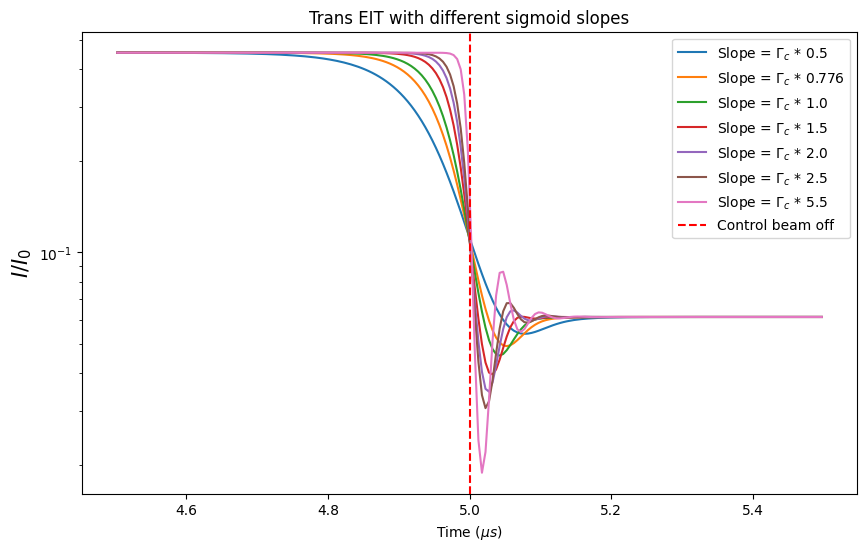

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
for slope in sigmoid_slopes:
    absorption = results_dict[slope]
    plt.plot(tlist[900:1100] * (1e6), absorption[900:1100], label=f'Slope = $\Gamma_c$ * {slope/Gamma_c}')
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
plt.yscale(
    'log'
)
plt.legend()
plt.title('Trans EIT with different sigmoid slopes')
plt.show()

In [ ]:
1/(2.5* Gamma_c)

1.1071648215088372e-08

<ipython-input-235-7806bc9860af>:65: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-k * (x - x0)))


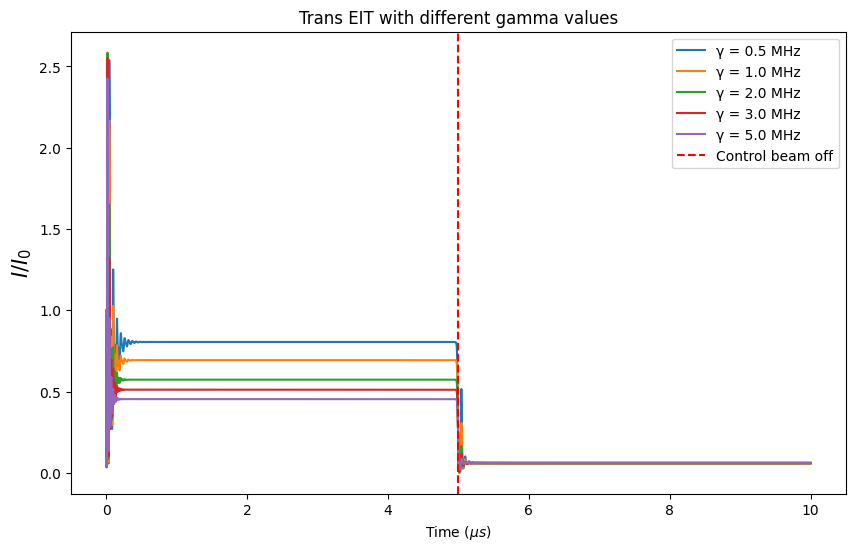

In [ ]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Simulation parameters
length = 1e-2  # Length of the cell
temp = 80  # C, temperature of the cell
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Angular Freq of control F=2
lmda_b = (2 * np.pi) * 3e8 / w_b  # Wavelength of the probe
lmda_c = (2 * np.pi) * 3e8 / w_c  # Wavelength of the control

# Wavevector, Direction of the beam
k_b = w_b / 3e8  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c / 3e8  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Number density Calc from the Clausius-Clapeyron relation
Tk = temp + 273.15  # K
if Tk < 39.48 + 273.15:
    Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)
RBolt = 8.314  # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)

# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data
Gamma_b = .1 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |c>, control transition

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c>
ba = tensor(state_b * state_a.dag())  # |b><a>
ca = tensor(state_c * state_a.dag())  # |c><a>
cb = tensor(state_c * state_b.dag())  # |c><b>
bc = tensor(state_b * state_c.dag())  # |b><c>

# Initial state
rho0 = (cc + bb) / np.sqrt(2)

# Time points for the simulation
tlist = np.linspace(0, 10, 2000) / (1e6)
t_pump_off = 5.0 / (1e6)  # Time at which the pump field is turned off

# Sigmoid function for smooth transition
def sigmoid(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Constant sigmoid slope value
sigmoid_slope = 5.5* Gamma_c  # Use Gamma_c as the slope

# Range of gamma values
gamma_values = [0.5 * 2 * np.pi * 1e6, 1 * 2 * np.pi * 1e6, 2 * 2 * np.pi * 1e6, 3 * 2 * np.pi * 1e6, 5 * 2 * np.pi * 1e6]

# Store results
results_dict = {}

for gamma in gamma_values:

    # Collapse operators
    c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
    c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
    c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
    c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
    collapse = [c1, c2, c3, c4]

    # Time-dependent Hamiltonian
    def H_t(t, args):
        Omega_c_t = Omega_c * sigmoid(t, t_pump_off, -sigmoid_slope)  # Sigmoid transition with constant slope
        Delta_c = 0  # One photon detuning
        Delta_b = 0  # One photon detuning
        return (Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Delta_c * (aa - cc) + Delta_b * (aa - bb))

    # Solve the master equation
    result = mesolve(H_t, rho0, tlist, collapse, [ba.dag()])

    # Extract the results
    probe_coherence = result.expect[0]
    absorption_list = np.imag(probe_coherence)

    # Calculate alpha and absorption
    alpha = k_b * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * np.array(absorption_list)
    absorption = np.exp(-alpha * length)

    # Store the results
    results_dict[gamma] = absorption

# Plot the results
plt.figure(figsize=(10, 6))
for gamma in gamma_values:
    absorption = results_dict[gamma]
    plt.plot(tlist * (1e6), absorption, label=f'γ = {gamma/(2*np.pi*1e6):.1f} MHz')
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
plt.legend()
plt.title('Trans EIT with different gamma values')
plt.show()


In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
for gamma in gamma_values:
    absorption = results_dict[gamma]
    plt.plot(tlist[1] * (1e6), absorption, label=f'γ = {gamma/(2*np.pi*1e6):.1f} MHz')
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
plt.legend()
plt.title('Trans EIT with different gamma values')
plt.show()

<ipython-input-18-38a850ba68b5>:67: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-k * (x - x0)))


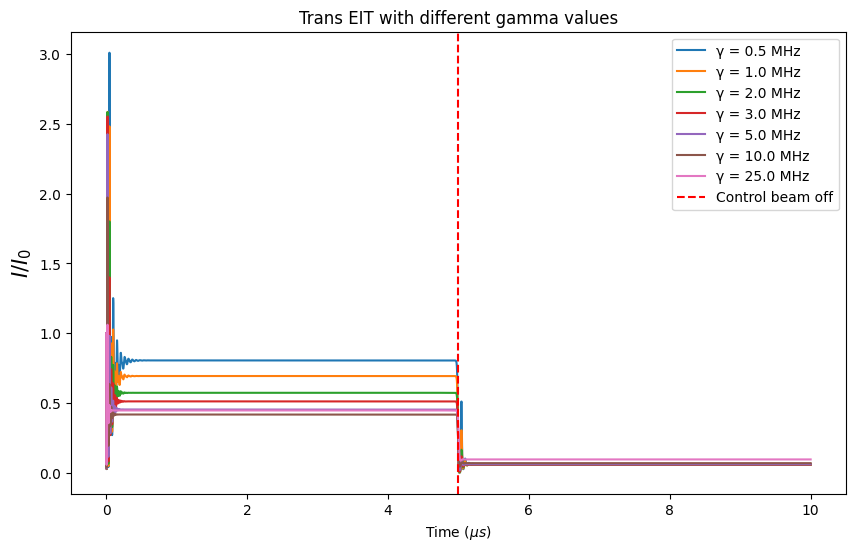

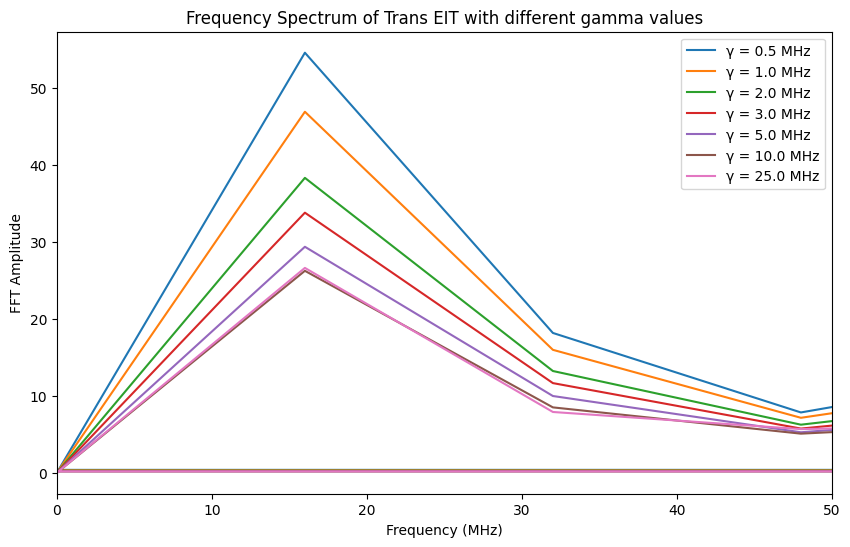

In [ ]:
# gamma and FFT #
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftfreq

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Simulation parameters
length = 1e-2  # Length of the cell
temp = 80  # C, temperature of the cell
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Angular Freq of control F=2
lmda_b = (2 * np.pi) * 3e8 / w_b  # Wavelength of the probe
lmda_c = (2 * np.pi) * 3e8 / w_c  # Wavelength of the control

# Wavevector, Direction of the beam
k_b = w_b / 3e8  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c / 3e8  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Number density Calc from the Clausius-Clapeyron relation
Tk = temp + 273.15  # K
if Tk < 39.48 + 273.15:
    Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)
RBolt = 8.314  # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)

# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius)  # Rabi frequency for |a> <-> |c>, Control
Omega_b = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data
Gamma_b = .1 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |c>, control transition

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c>
ba = tensor(state_b * state_a.dag())  # |b><a>
ca = tensor(state_c * state_a.dag())  # |c><a>
cb = tensor(state_c * state_b.dag())  # |c><b>
bc = tensor(state_b * state_c.dag())  # |b><c>

# Initial state
rho0 = (cc + bb) / np.sqrt(2)

# Time points for the simulation
tlist = np.linspace(0, 10, 4000) / (1e6)
t_pump_off = 5.0 / (1e6)  # Time at which the pump field is turned off

# Sigmoid function for smooth transition
def sigmoid(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Constant sigmoid slope value
sigmoid_slope = 5.5*Gamma_c  # Use Gamma_c as the slope

# Range of gamma values
gamma_values = [0.5 * 2 * np.pi * 1e6, 1 * 2 * np.pi * 1e6, 2 * 2 * np.pi * 1e6, 3 * 2 * np.pi * 1e6, 5 * 2 * np.pi * 1e6,10 * 2 * np.pi * 1e6,25 * 2 * np.pi * 1e6]

# Store results
results_dict = {}
fft_dict = {}

for gamma in gamma_values:

    # Collapse operators
    c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
    c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
    c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
    c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
    collapse = [c1, c2, c3, c4]

    # Time-dependent Hamiltonian
    def H_t(t, args):
        Omega_c_t = Omega_c * sigmoid(t, t_pump_off, -sigmoid_slope)  # Sigmoid transition with constant slope
        Delta_c = 0  # One photon detuning
        Delta_b = 0  # One photon detuning
        return (Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Delta_c * (aa - cc) + Delta_b * (aa - bb))

    # Solve the master equation
    result = mesolve(H_t, rho0, tlist, collapse, [ba.dag()])

    # Extract the results
    probe_coherence = result.expect[0]
    absorption_list = np.imag(probe_coherence)

    # Calculate alpha and absorption
    alpha = k_b * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * np.array(absorption_list)
    absorption = np.exp(-alpha * length)

    # Store the results
    results_dict[gamma] = absorption

   # Perform FFT on the specified interval
    absorption_subset = absorption[1900:2150]
    absorption_AC = absorption_subset - np.mean(absorption_subset)  # Remove DC offset
    tlist_subset = tlist[1900:2150]
    fft_result = fft(absorption_AC)
    N = len(absorption)
    n = np.arange(N)
    sr = 1/(4000)  # Sample rate
    T = N/sr
    #fft_freq = n/T
    fft_freq = fftfreq(fft_result.size, d = 1/4000 )
    fft_dict[gamma] = (fft_freq, np.abs(fft_result))

# Plot the time-domain results
plt.figure(figsize=(10, 6))
for gamma in gamma_values:
    absorption = results_dict[gamma]
    plt.plot(tlist * (1e6), absorption, label=f'γ = {gamma/(2*np.pi*1e6):.1f} MHz')
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
plt.legend()
plt.title('Trans EIT with different gamma values')
plt.show()

# Plot the FFT results
plt.figure(figsize=(10, 6))
for gamma in gamma_values:
    fft_freq, fft_result = fft_dict[gamma]
    plt.plot(fft_freq, fft_result, label=f'γ = {gamma/(2*np.pi*1e6):.1f} MHz')
plt.xlim(0, 50)  # Limit x-axis for better visibility
plt.xlabel('Frequency (MHz)')
plt.ylabel('FFT Amplitude')
plt.legend()
plt.title('Frequency Spectrum of Trans EIT with different gamma values')
plt.show()


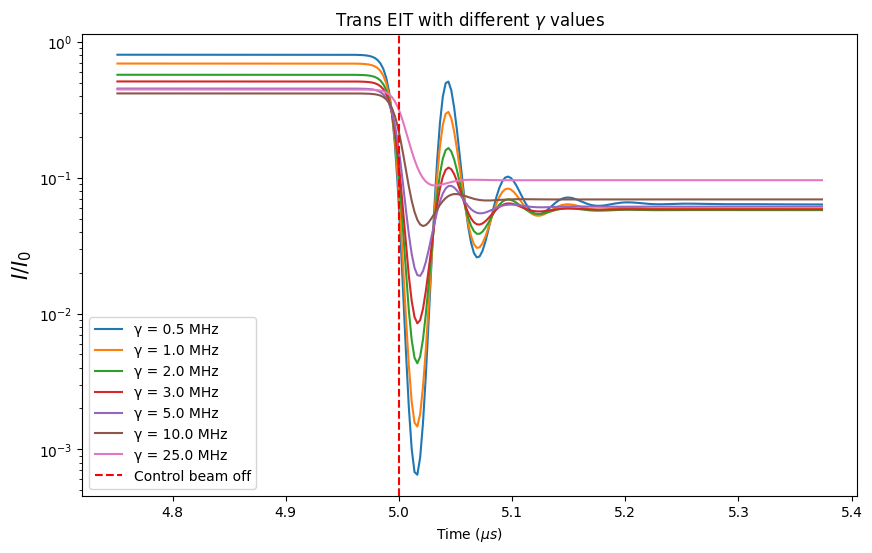

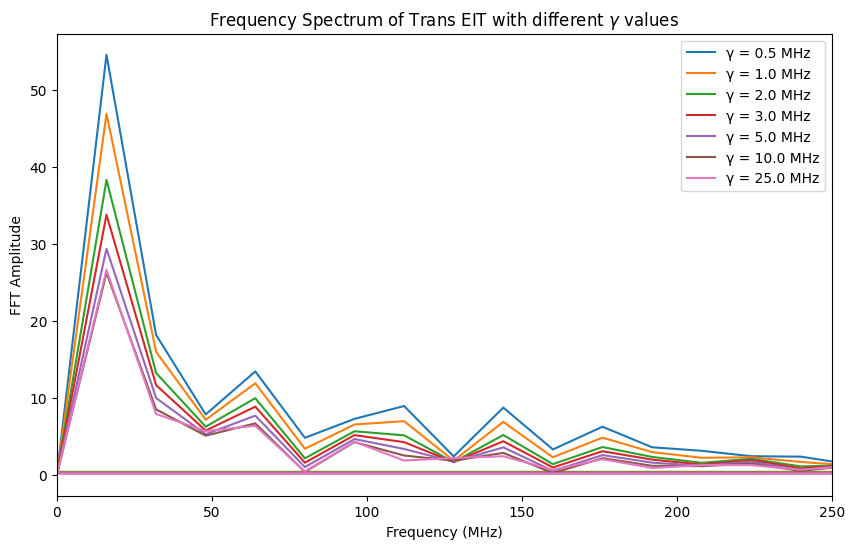

In [ ]:
# Plot the time-domain results
plt.figure(figsize=(10, 6))
for gamma in gamma_values:
    absorption = results_dict[gamma]
    plt.plot(tlist[1900:2150] * (1e6), absorption[1900:2150], label=f'γ = {gamma/(2*np.pi*1e6):.1f} MHz')
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
plt.legend()
plt.yscale(
    'log'
)
plt.title('Trans EIT with different $\gamma$ values')
plt.show()

# Plot the FFT results
plt.figure(figsize=(10, 6))
for gamma in gamma_values:
    fft_freq, fft_result = fft_dict[gamma]
    plt.plot(fft_freq, fft_result, label=f'γ = {gamma/(2*np.pi*1e6):.1f} MHz')
plt.xlim(0, 250)  # Limit x-axis for better visibility
plt.xlabel('Frequency (MHz)')
plt.ylabel('FFT Amplitude')
plt.legend()
plt.title('Frequency Spectrum of Trans EIT with different $\gamma$ values')
plt.show()

<ipython-input-22-e17a5cab8ced>:74: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-k * (x - x0)))
<ipython-input-22-e17a5cab8ced>:101: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = k_b * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * np.array(absorption_list)
<ipython-input-22-e17a5cab8ced>:101: RuntimeWarning: invalid value encountered in multiply
  alpha = k_b * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * np.array(absorption_list)


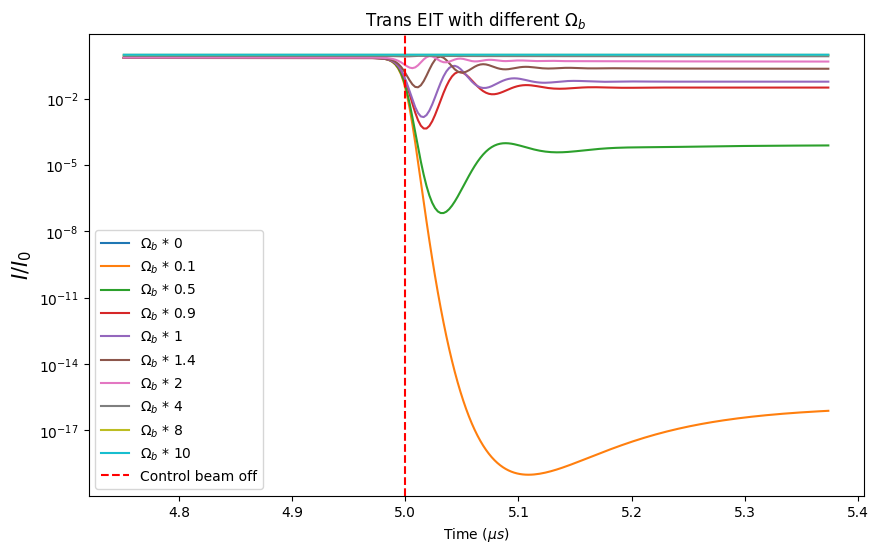

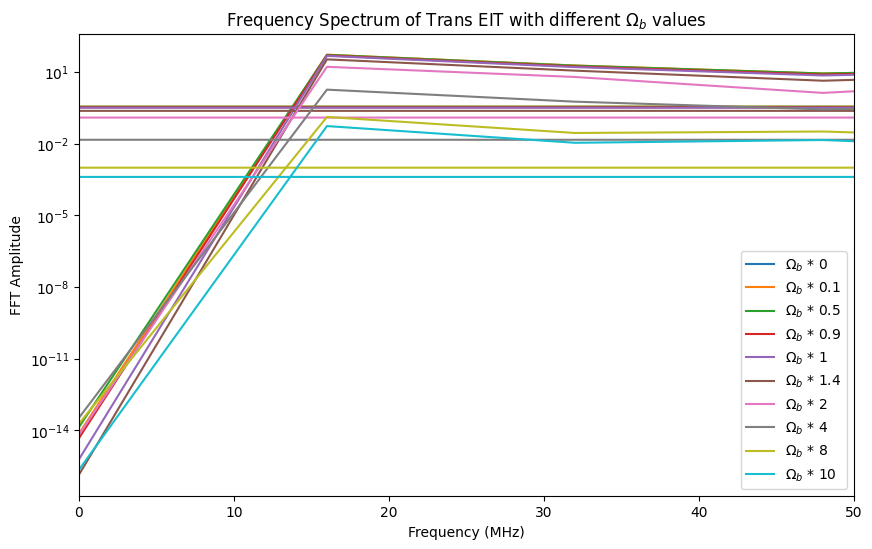

In [ ]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftfreq

# Define the basis states
state_b = basis(3, 0)  # state |b>
state_a = basis(3, 1)  # state |a>
state_c = basis(3, 2)  # state |c>

# Simulation parameters
length = 1e-2  # Length of the cell
gamma = 1 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |b> to |c>, coherence decay rate (b->c)
temp = 80  # C, temperature of the cell
w_b = (377.10746338e12 - 4.271676631815181e9) * (2 * np.pi)  # Angular Freq of probe F=1
w_c = (377.10746338e12 + 2.563005979089109e9) * (2 * np.pi)  # Angular Freq of control F=2
lmda_b = (2 * np.pi) * 3e8 / w_b  # Wavelength of the probe
lmda_c = (2 * np.pi) * 3e8 / w_c  # Wavelength of the control

# Wavevector, Direction of the beam
k_b = w_b / 3e8  # wave number of probe, beams are co-propagating, for counter propagation multiply by -1
k_c = w_c / 3e8  # wave number of control, beams are co-propagating, for counter propagation multiply by -1

# Number density Calc from the Clausius-Clapeyron relation
Tk = temp + 273.15  # K
if Tk < 39.48 + 273.15:
    Pressure = 10 ** (2.881 + 4.857 - 4215 / Tk)
else:
    Pressure = 10 ** (2.881 + 4.312 - 4040 / Tk)
RBolt = 8.314  # J/mol.K
Nav = 6.02214076e23  # 1/mol
numberDensity = Pressure * Nav / (RBolt * Tk)

# Rabi frequencies for pump and control beam
eps = 8.85e-12
hbar = 1.05e-34
dipole = 3.58e-29
c = 3e8
power_c = 3e-3  # Power for Control beam
power_b = 1e-3  # Power for probe beam
radius = 2e-3
Omega_c = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_c) / radius)  # Rabi frequency for |a> <-> |c>, Control
Omega_b_base = ((dipole / np.sqrt(eps * c * hbar**2 * np.pi)) * np.sqrt(power_b) / radius)  # Rabi frequency for |a> <-> |b>, probe

# Decay rates from steck data
Gamma_b = .1 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |b>, probe transition
Gamma_c = 5.75 * 2 * np.pi * 1e6  # 2pi MHz, Decay rate from |a> to |c>, control transition

# Define the operators
aa = tensor(state_a * state_a.dag())  # |a><a|
bb = tensor(state_b * state_b.dag())  # |b><b|
cc = tensor(state_c * state_c.dag())  # |c><c|
ba = tensor(state_b * state_a.dag())  # |b><a>
ca = tensor(state_c * state_a.dag())  # |c><a>
cb = tensor(state_c * state_b.dag())  # |c><b|
bc = tensor(state_b * state_c.dag())  # |b><c|

# Collapse operators
c1 = np.sqrt(Gamma_b) * ca  # a-c coherence decay (probe transition)
c2 = np.sqrt(Gamma_c) * ba  # a-b coherence decay (control transition)
c3 = np.sqrt(gamma) * cb  # b-c coherence decay (coherence decay rate (c->b))
c4 = np.sqrt(gamma) * bc  # c-b coherence decay (coherence decay rate (b->c))
collapse = [c1, c2, c3, c4]

# Initial state
rho0 = (cc + bb) / np.sqrt(2)

# Time points for the simulation
tlist = np.linspace(0, 10, 4000) / (1e6)
t_pump_off = 5.0 / (1e6)  # Time at which the pump field is turned off

# Sigmoid function for smooth transition
def sigmoid(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Scaling factors for Omega_c
scaling_factors = [0,.1,.5,.9, 1, 1.4, 2, 4, 8, 10]

# Store results
results_dict = {}
fft_dict = {}

for factor in scaling_factors:
    Omega_b = Omega_b_base * factor

    # Time-dependent Hamiltonian
    def H_t(t, args):
        Omega_c_t = Omega_c * sigmoid(t, t_pump_off, -5.5*Gamma_c)  # Sigmoid transition
        Delta_c = 0  # One photon detuning
        Delta_b = 0  # One photon detuning
        return (Omega_b * (ba + ba.dag()) + Omega_c_t * (ca + ca.dag()) + Delta_c * (aa - cc) + Delta_b * (aa - bb))

    # Solve the master equation
    result = mesolve(H_t, rho0, tlist, collapse, [ba.dag()])

    # Extract the results
    probe_coherence = result.expect[0]
    absorption_list = np.imag(probe_coherence)

    # Calculate alpha and absorption
    alpha = k_b * (numberDensity * dipole**2 / (hbar * eps * Omega_b)) * np.array(absorption_list)
    absorption = np.exp(-alpha * length)

    # Store the results
    results_dict[factor] = absorption

   # Perform FFT on the specified interval
    absorption_subset = absorption[1900:2150]
    absorption_AC = absorption_subset - np.mean(absorption_subset)  # Remove DC offset
    tlist_subset = tlist[1900:2150]
    fft_result = fft(absorption_AC)
    N = len(absorption)
    n = np.arange(N)
    sr = 1/(4000)  # Sample rate
    T = N/sr
    #fft_freq = n/T
    fft_freq = fftfreq(fft_result.size, d = 1/4000 )
    fft_dict[factor] = (fft_freq, np.abs(fft_result))

# Plot the results
plt.figure(figsize=(10, 6))
for factor in scaling_factors:
    absorption = results_dict[factor]
    plt.plot(tlist[1900:2150] * (1e6), absorption[1900:2150], label=f'$\Omega_b$ * {factor}')
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
plt.yscale('log')
plt.legend()
plt.title('Trans EIT with different $\Omega_b$')
plt.show()

# Plot the FFT results
plt.figure(figsize=(10, 6))
for factor in scaling_factors:
    fft_freq, fft_result = fft_dict[factor]
    plt.plot(fft_freq, fft_result, label=f'$\Omega_b$ * {factor}')
plt.xlim(0, 50)  # Limit x-axis for better visibility
plt.xlabel('Frequency (MHz)')
plt.ylabel('FFT Amplitude')
plt.legend()
plt.yscale('log')
plt.title('Frequency Spectrum of Trans EIT with different $\Omega_b$ values')
plt.show()


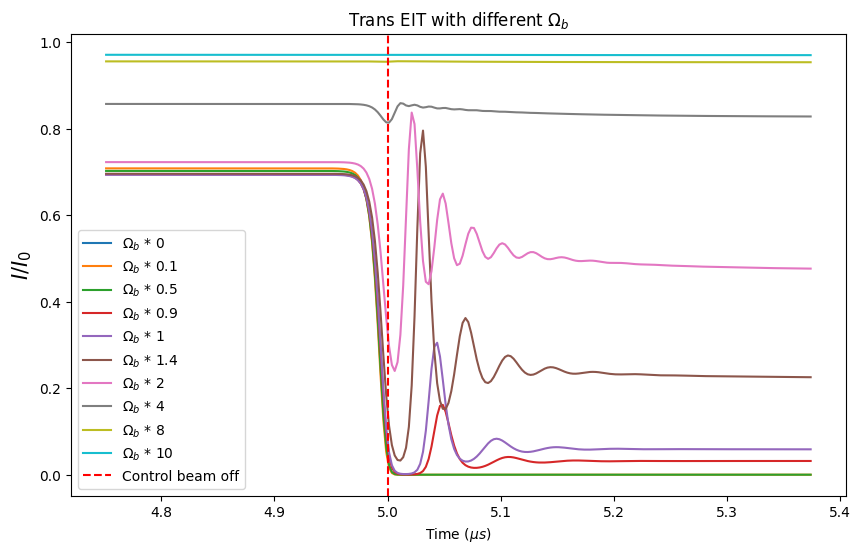

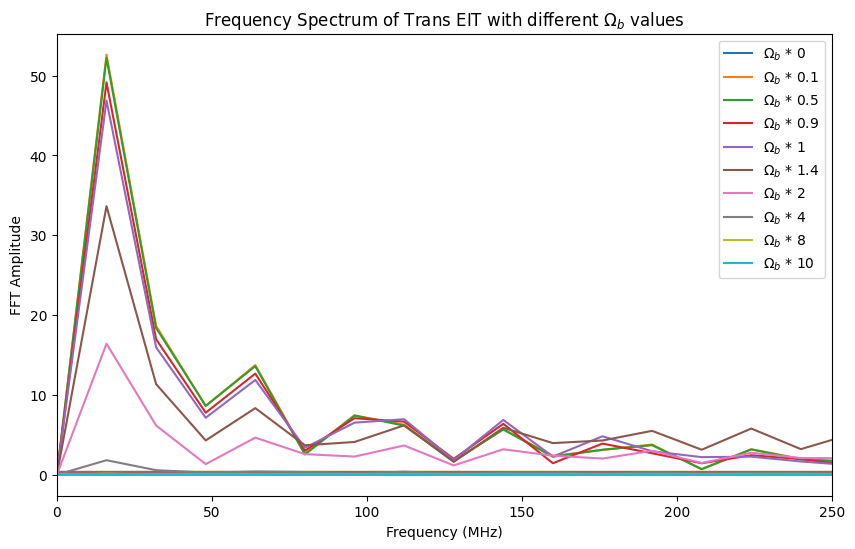

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
for factor in scaling_factors:
    absorption = results_dict[factor]
    plt.plot(tlist[1900:2150] * (1e6), absorption[1900:2150], label=f'$\Omega_b$ * {factor}')
plt.axvline(t_pump_off * (1e6), color='r', linestyle='--', label="Control beam off")
plt.xlabel('Time ($\mu s$)')
plt.ylabel('$I/I_0$', fontsize=15)
#plt.yscale('log')
plt.legend()
plt.title('Trans EIT with different $\Omega_b$')
plt.show()

# Plot the FFT results
plt.figure(figsize=(10, 6))
for factor in scaling_factors:
    fft_freq, fft_result = fft_dict[factor]
    plt.plot(fft_freq, fft_result, label=f'$\Omega_b$ * {factor}')
plt.xlim(0, 250)  # Limit x-axis for better visibility
plt.xlabel('Frequency (MHz)')
plt.ylabel('FFT Amplitude')
plt.legend()
plt.title('Frequency Spectrum of Trans EIT with different $\Omega_b$ values')
plt.show()